<a href="https://colab.research.google.com/github/gitblankhub/Baf/blob/main/%EC%82%B0%EB%B6%88/%EC%B5%9C%EC%A2%85_%EA%B3%B5%EC%9C%A0)%EA%B3%B5%ED%86%B5%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (31.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
plt.rc('font', family='NanumBarunGothic')

# DATA - 공통

In [ ]:
d1221=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/산불/data_1.csv',encoding='cp949')

In [ ]:
d1221.isna().sum()

Unnamed: 0      0
year            0
month           0
day             0
hour            0
발생일시_요일         0
진화종료시간_년        0
진화종료시간_월        0
진화종료시간_일        0
진화종료시간_시간       0
발생장소_관서         0
발생장소_시도         0
발생장소_시군구        0
발생장소_읍면         8
발생장소_동리        28
발생원인_구분         0
발생원인_세부원인       0
발생원인_기타       477
피해면적_합계         0
발생              0
진화              0
진화시간            0
진화시간_분          0
진화시간_시간         0
기온              0
강수량             0
풍속              0
풍향              0
습도              0
증기압             0
이슬점온도           0
해면기압            0
현지기압            0
일조              0
지면온도            0
dtype: int64

In [ ]:
set(d1221['발생장소_시군구'])

{'강릉',
 '고성',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성'}

In [ ]:
d1221[d1221['발생']=='2021-06-07 15:13:00'].iloc[:,1:]

,year,month,day,hour,발생일시_요일,진화종료시간_년,진화종료시간_월,진화종료시간_일,진화종료시간_시간,발생장소_관서,...,강수량,풍속,풍향,습도,증기압,이슬점온도,해면기압,현지기압,일조,지면온도
709,2021,6,7,15,월,2021,6,7,17:00,강원,...,0.0,3.0,230.0,40.0,16.2,14.2,1008.4,1011.4,0.1,28.1
710,2021,6,7,15,월,2021,6,7,16:00,강원,...,0.0,3.0,230.0,40.0,16.2,14.2,1008.4,1011.4,0.1,28.1


In [ ]:
d1221=d1221.drop(710) #공통된 행 제거

In [ ]:
d1221

,Unnamed: 0,year,month,day,hour,발생일시_요일,진화종료시간_년,진화종료시간_월,진화종료시간_일,진화종료시간_시간,...,강수량,풍속,풍향,습도,증기압,이슬점온도,해면기압,현지기압,일조,지면온도
0,0,2012,1,11,15,수,2012,1,11,16:50,...,2.0,1.3,290.0,22.0,1.3,-20.0,1011.5,1029.5,1.0,3.2
1,1,2012,2,5,16,일,2012,2,5,16:49,...,0.0,2.5,244.0,15.0,7.8,-19.7,982.4,1021.9,0.0,8.9
2,2,2012,2,16,14,목,2012,2,16,15:15,...,0.0,3.3,320.0,14.0,1.0,-22.3,1002.6,1021.1,1.0,11.1
3,3,2012,3,12,15,월,2012,3,12,16:40,...,0.0,2.6,271.4,20.8,1.7,-16.3,982.4,1021.9,0.0,-12.6
4,4,2012,3,30,17,금,2012,3,30,19:00,...,0.0,3.8,270.3,30.2,1.7,-16.3,982.4,1021.9,0.0,-12.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,713,2021,8,10,14,화,2021,8,10,16:24,...,6.0,3.1,180.0,58.0,26.0,21.7,998.2,1006.6,0.8,46.7
714,714,2021,11,14,21,일,2021,11,15,03:00,...,0.0,1.0,244.8,61.4,1.7,-16.3,992.4,1032.6,0.0,-12.6
715,715,2021,11,29,13,월,2021,11,29,15:40,...,0.0,0.9,250.2,41.2,1.7,-16.3,992.4,1032.6,0.0,-12.6
716,716,2021,12,19,15,일,2021,12,19,16:20,...,1.1,2.8,250.0,22.0,2.2,-13.5,1015.4,1018.7,1.0,10.3


# DATA *

### graph

year
2012     43
2013     36
2014     73
2015    125
2016     91
2017    103
2018     47
2019     78
2020     73
2021     48
dtype: int64


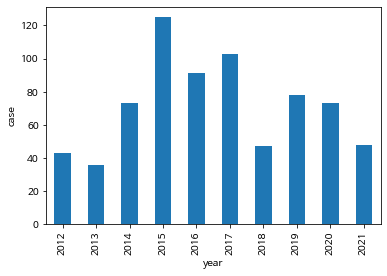

In [ ]:
print(d1221.groupby('year').size())
d1221.groupby('year').size().plot(kind='bar')
plt.xlabel('year')
plt.ylabel('case')
plt.show()

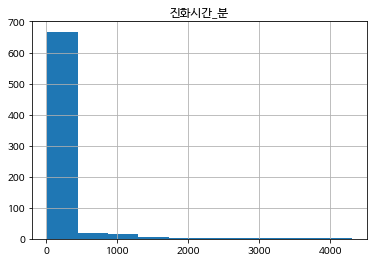

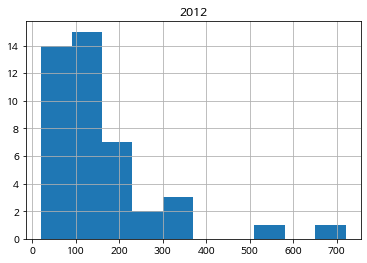

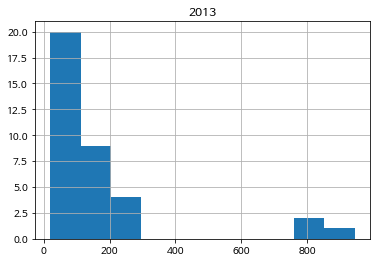

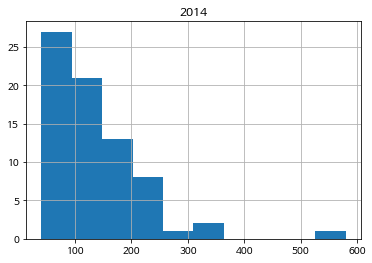

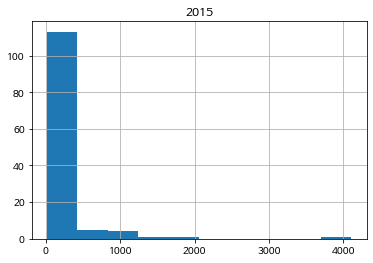

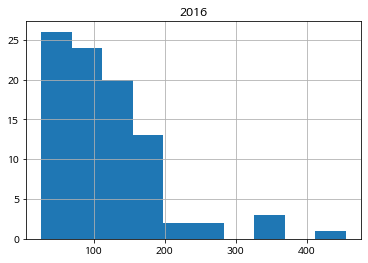

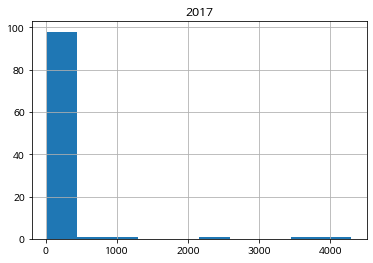

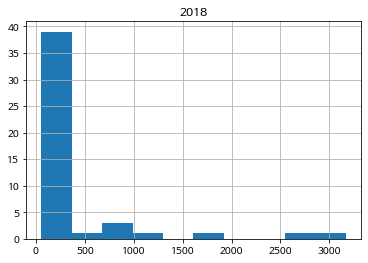

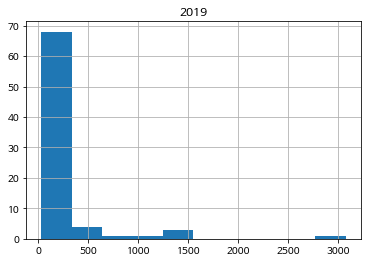

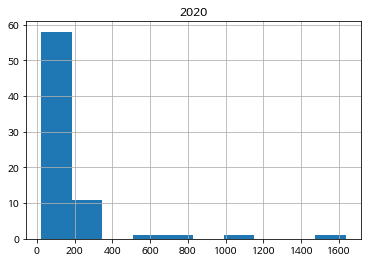

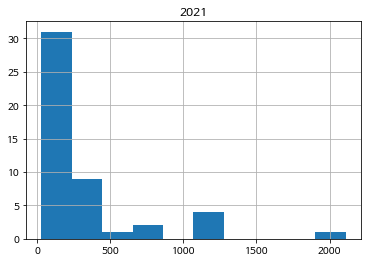

In [ ]:
# 진화시간
d1221.hist(column='진화시간_분')
plt.show()

for i in range(2012,2022,1):
  d1221[d1221['year']==i].hist(column='진화시간_분')
  plt.title(i)
  plt.show()

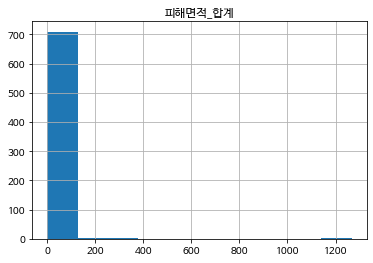

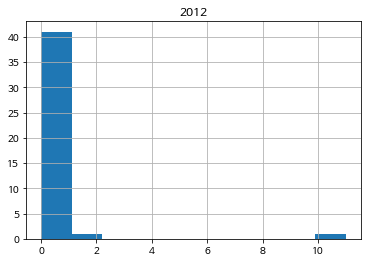

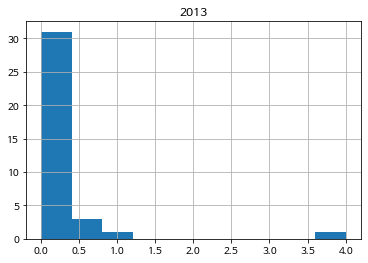

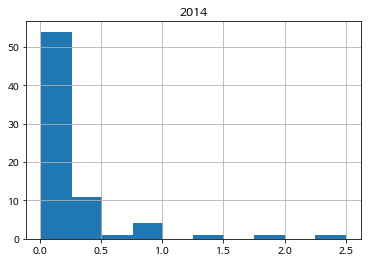

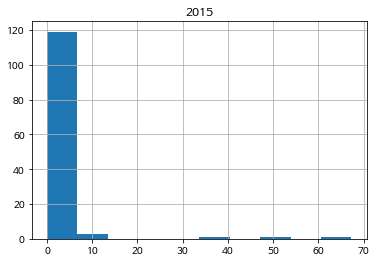

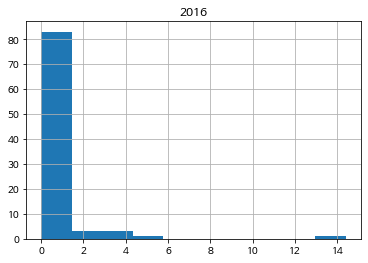

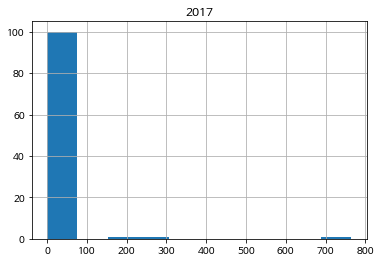

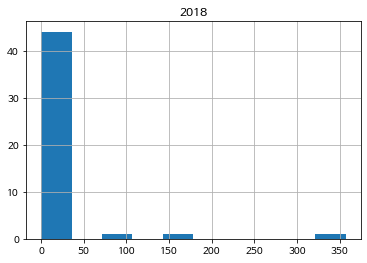

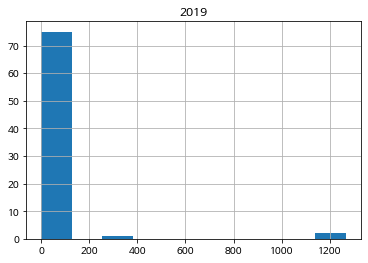

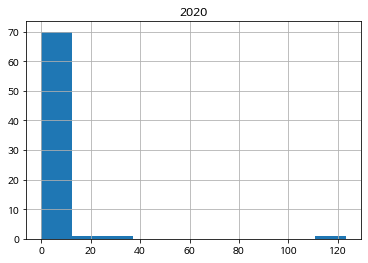

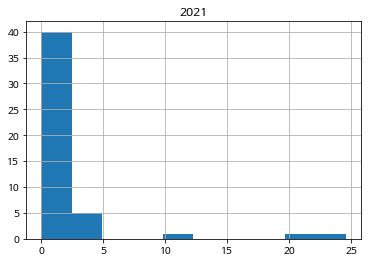

In [ ]:
# 피해면적 합계
d1221.hist(column='피해면적_합계')
plt.show()

for i in range(2012,2022,1):
  d1221[d1221['year']==i].hist(column='피해면적_합계')
  plt.title(i)
  plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


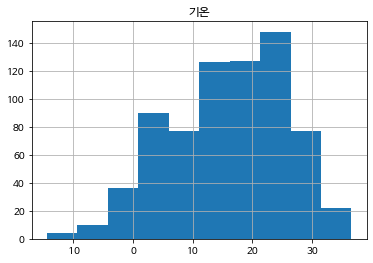

In [ ]:
# 기온
d1221.hist(column='기온')
plt.show()

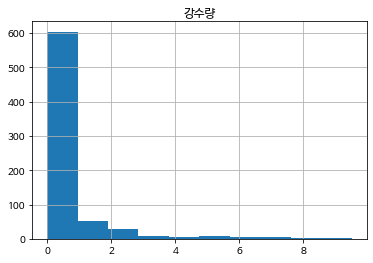

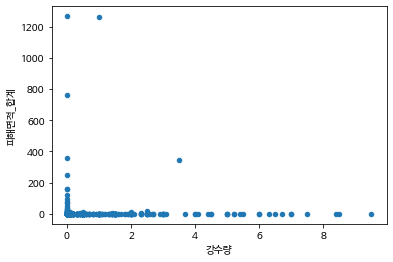

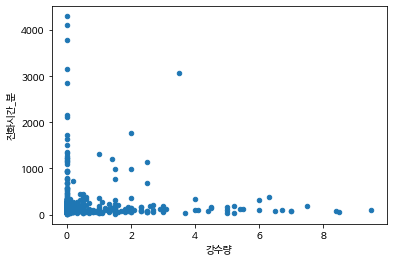

In [ ]:
# 강수량
d1221.hist(column='강수량')
plt.show()

d1221.plot.scatter(x='강수량',y='피해면적_합계')
plt.show()

d1221.plot.scatter(x='강수량',y='진화시간_분')
plt.show()

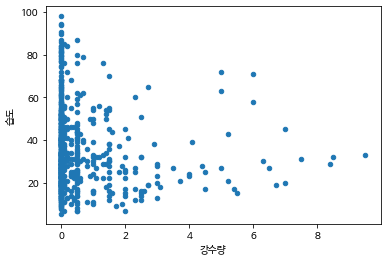

In [ ]:
# 강수량 습도
d1221.plot.scatter(x='강수량',y='습도')
plt.show()

### 결측치

In [ ]:
#data2=data2.reset_index()
d1221.isna().sum()

Unnamed: 0      0
year            0
month           0
day             0
hour            0
발생일시_요일         0
진화종료시간_년        0
진화종료시간_월        0
진화종료시간_일        0
진화종료시간_시간       0
발생장소_관서         0
발생장소_시도         0
발생장소_시군구        0
발생장소_읍면         8
발생장소_동리        28
발생원인_구분         0
발생원인_세부원인       0
발생원인_기타       477
피해면적_합계         0
발생              0
진화              0
진화시간            0
진화시간_분          0
진화시간_시간         0
기온              0
강수량             0
풍속              0
풍향              0
습도              0
증기압             0
이슬점온도           0
해면기압            0
현지기압            0
일조              0
지면온도            0
dtype: int64

### 파생변수 : 피해면적 30ha 이상


In [ ]:
d1221.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'hour', '발생일시_요일', '진화종료시간_년',
       '진화종료시간_월', '진화종료시간_일', '진화종료시간_시간', '발생장소_관서', '발생장소_시도', '발생장소_시군구',
       '발생장소_읍면', '발생장소_동리', '발생원인_구분', '발생원인_세부원인', '발생원인_기타', '피해면적_합계',
       '발생', '진화', '진화시간', '진화시간_분', '진화시간_시간', '기온', '강수량', '풍속', '풍향', '습도',
       '증기압', '이슬점온도', '해면기압', '현지기압', '일조', '지면온도'],
      dtype='object')

In [ ]:
data3=pd.DataFrame(d1221[['year', 'month', 'day', 'hour',
                    '발생장소_시군구', '발생원인_구분', '피해면적_합계','진화시간_분',
                    '기온', '강수량', '풍속', '풍향', '습도', '이슬점온도',
                    '현지기압', '해면기압','일조', '지면온도']])
data3.head(3)

,year,month,day,hour,발생장소_시군구,발생원인_구분,피해면적_합계,진화시간_분,기온,강수량,풍속,풍향,습도,이슬점온도,현지기압,해면기압,일조,지면온도
0,2012,1,11,15,홍천,입,0.03,95.0,-0.9,2.0,1.3,290.0,22.0,-20.0,1029.5,1011.5,1.0,3.2
1,2012,2,5,16,고성,입,0.20,21.0,8.4,0.0,2.5,244.0,15.0,-19.7,1021.9,982.4,0.0,8.9
2,2012,2,16,14,원주,건,0.10,70.0,2.6,0.0,3.3,320.0,14.0,-22.3,1021.1,1002.6,1.0,11.1


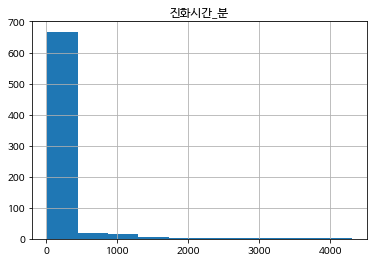

In [ ]:
data3.hist(column='진화시간_분')
plt.show()

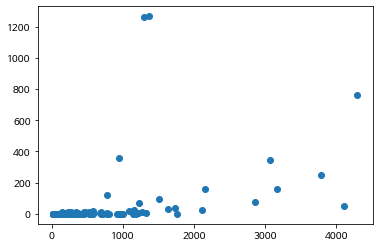

In [ ]:
plt.scatter(data3['진화시간_분'],data3['피해면적_합계'])
plt.show()

In [ ]:
# 대형산불
data4 = data3
data4['대형산불']=0

# 30 ha 이상

for i in data3.index:
  if i in data3[ data3['피해면적_합계']>=30 ].index :
    data4['대형산불'][i]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
data4.head(3)

,year,month,day,hour,발생장소_시군구,발생원인_구분,피해면적_합계,진화시간_분,기온,강수량,풍속,풍향,습도,이슬점온도,현지기압,해면기압,일조,지면온도,대형산불
0,2012,1,11,15,홍천,입,0.03,95.0,-0.9,2.0,1.3,290.0,22.0,-20.0,1029.5,1011.5,1.0,3.2,0
1,2012,2,5,16,고성,입,0.20,21.0,8.4,0.0,2.5,244.0,15.0,-19.7,1021.9,982.4,0.0,8.9,0
2,2012,2,16,14,원주,건,0.10,70.0,2.6,0.0,3.3,320.0,14.0,-22.3,1021.1,1002.6,1.0,11.1,0


In [ ]:
# 계절
# 봄(3~5월)	 여름(6~8월)	가을(9~11월)	겨울(12,1~2월)
data4['season']=''
for i in data4.index:
  if i in data4[ (data4['month']==3) | (data4['month']==4) | (data4['month']==5) ].index:
    data4['season'][i]='봄'
  elif i in data4[ (data4['month']==6) | (data4['month']==7) | (data4['month']==8) ].index:
    data4['season'][i]='여름'
  elif i in data4[ (data4['month']==9) | (data4['month']==10) | (data4['month']==11) ].index:
    data4['season'][i]='가을'
  elif i in data4[ (data4['month']==12) | (data4['month']==1) | (data4['month']==2) ].index:
    data4['season'][i]='겨울'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarn

In [ ]:
data4.head(2)

,year,month,day,hour,발생장소_시군구,발생원인_구분,피해면적_합계,진화시간_분,기온,강수량,풍속,풍향,습도,이슬점온도,현지기압,해면기압,일조,지면온도,대형산불,season
0,2012,1,11,15,홍천,입,0.03,95.0,-0.9,2.0,1.3,290.0,22.0,-20.0,1029.5,1011.5,1.0,3.2,0,겨울
1,2012,2,5,16,고성,입,0.20,21.0,8.4,0.0,2.5,244.0,15.0,-19.7,1021.9,982.4,0.0,8.9,0,겨울


## PCA

#### 정규화 (data5)

강수량 = log (+1).  
풍속 = log (+1).  
습도 = log (+1)   
지면온도 = sqrt(+12.6)

진화시간 = log(+1)  
피해면적 = log  

*기압 - 혼합모델  
*풍향 0-360 일조 0-1   
*피해면적 이상치

In [ ]:
data5 = data4

import seaborn as sns
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


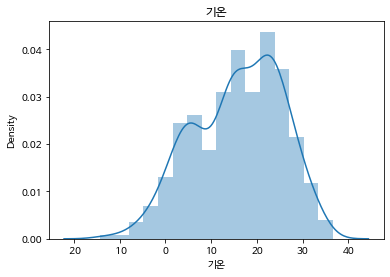

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


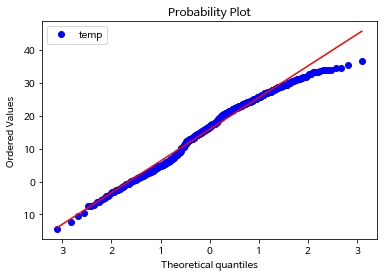

In [ ]:
sns.distplot(data5['기온'])
plt.title('기온')
plt.show()

stats.probplot(data5.기온 , dist=stats.norm,plot=plt)
plt.legend(['temp'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


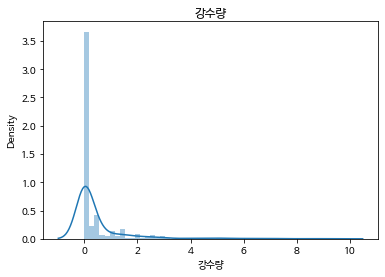

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


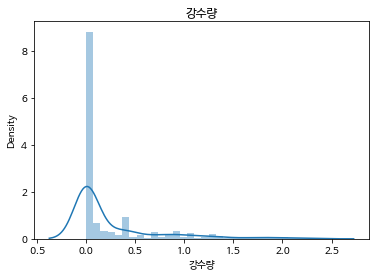

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


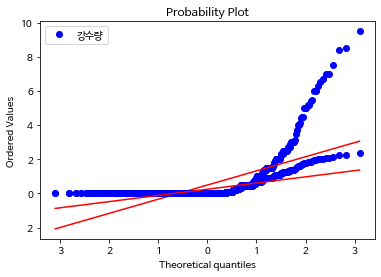

In [ ]:
# 강수량
sns.distplot(data5['강수량'])
plt.title('강수량')
plt.show()

sns.distplot(np.log1p(data5['강수량']))
plt.title('강수량')
plt.show()

stats.probplot(data5.강수량 , dist=stats.norm,plot=plt)
plt.legend(['강수량'])

stats.probplot(np.log1p(data5.강수량) , dist=stats.norm,plot=plt)
plt.show()

data5['강수량log']=np.log1p(data4['강수량'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


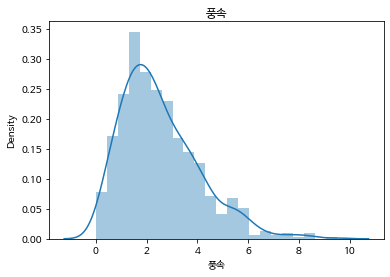

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


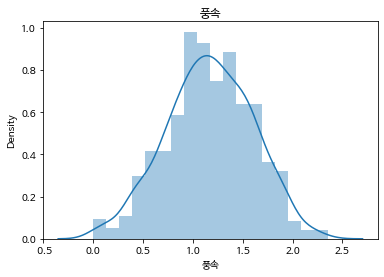

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


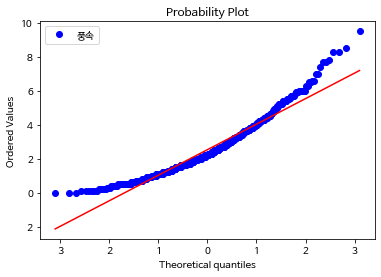

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


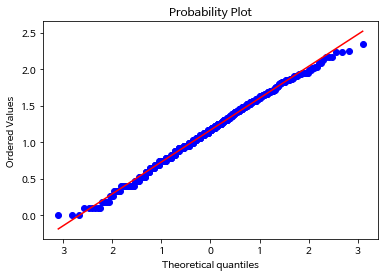

In [ ]:
# 풍속
sns.distplot(data5['풍속'])
plt.title('풍속')
plt.show()

sns.distplot(np.log1p(data5['풍속']))
plt.title('풍속')
plt.show()

stats.probplot(data5.풍속 , dist=stats.norm,plot=plt)
plt.legend(['풍속'])
plt.show()

stats.probplot(np.log1p(data5.풍속) , dist=stats.norm,plot=plt)
plt.show()

data5['풍속log']=np.log1p(data4['풍속'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


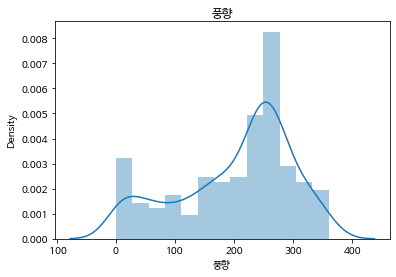

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


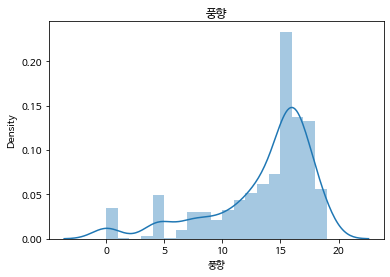

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


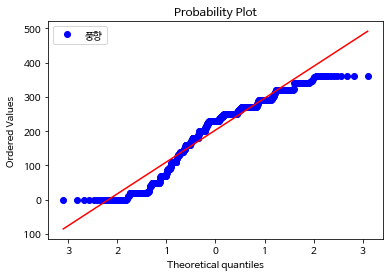

In [ ]:
# 풍향
sns.distplot(data5['풍향'])
plt.title('풍향')
plt.show()

sns.distplot(np.sqrt(data5['풍향']))
plt.title('풍향')
plt.show()

stats.probplot(data5.풍향 , dist=stats.norm,plot=plt)
plt.legend(['풍향'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


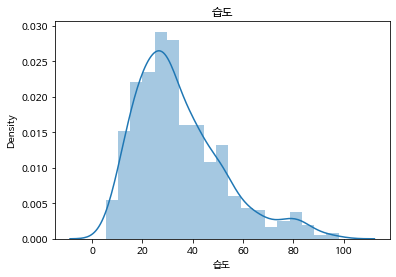

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


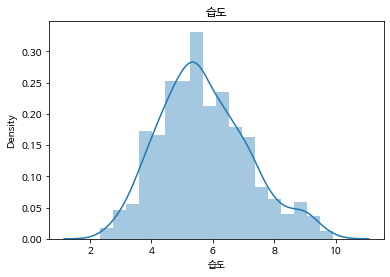

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


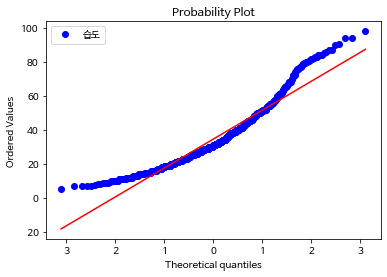

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


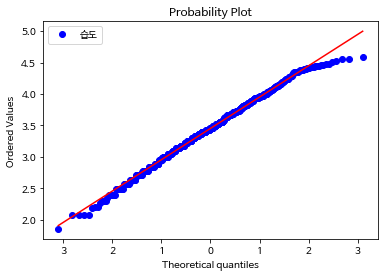

In [ ]:
# 습도
sns.distplot(data5['습도'])
plt.title('습도')
plt.show()

sns.distplot(np.sqrt(data5['습도']))
plt.title('습도')
plt.show()

stats.probplot(data5.습도 , dist=stats.norm,plot=plt)
plt.legend(['습도'])
plt.show()

stats.probplot(np.log1p(data5.습도), dist=stats.norm,plot=plt)
plt.legend(['습도'])
plt.show()

data5['습도log']=np.log1p(data4['습도'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


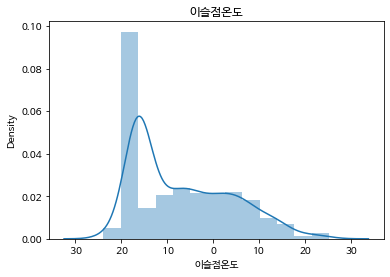

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


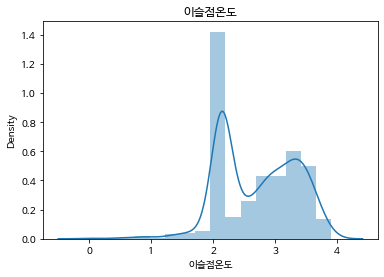

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


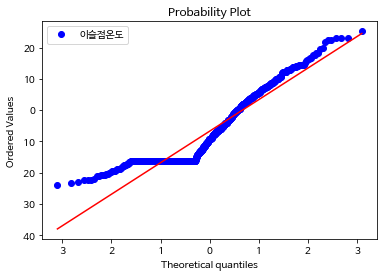

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


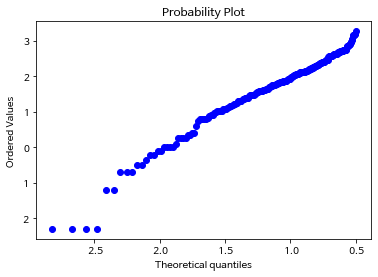

In [ ]:
# 이슬점온도 - 그대로
sns.distplot(data5['이슬점온도'])
plt.title('이슬점온도')
plt.show()

sns.distplot(np.log(data5['이슬점온도']+24.8))
plt.title('이슬점온도')
plt.show()

stats.probplot(data5.이슬점온도 , dist=stats.norm,plot=plt)
plt.legend(['이슬점온도'])
plt.show()

stats.probplot(np.log1p(data5.이슬점온도) , dist=stats.norm,plot=plt)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


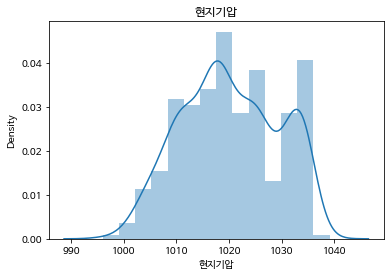

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


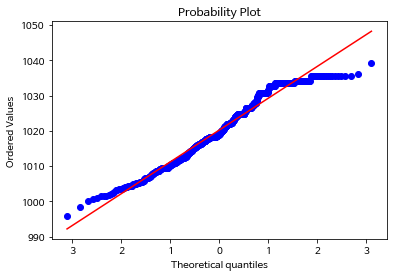

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


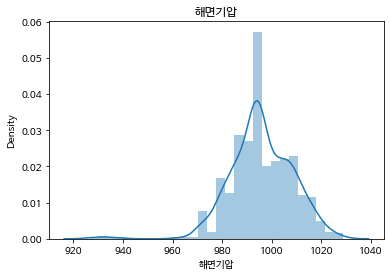

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


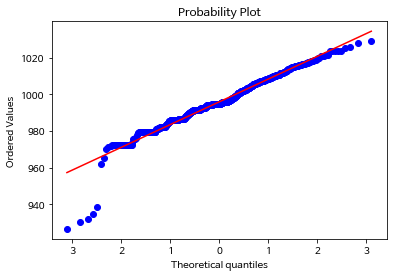

In [ ]:
# 현지기압
sns.distplot(data5['현지기압'])
plt.title('현지기압')
plt.show()

stats.probplot(data5.현지기압 , dist=stats.norm,plot=plt)
plt.show()


# 해면기압
sns.distplot(data5['해면기압'])
plt.title('해면기압')
plt.show()

stats.probplot(data5.해면기압 , dist=stats.norm,plot=plt)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


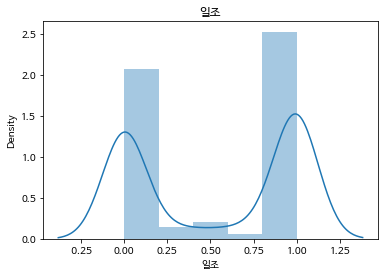

In [ ]:
# 일조 - 두 개의 혼합 모델 (낮 밤)
sns.distplot(data5['일조'])
plt.title('일조')
plt.show()

In [ ]:
print(min(data5['지면온도']))

print(data5['지면온도'].skew())
print(np.log(data5['지면온도']+13.6).skew())
print(np.sqrt(data5['지면온도']+12.6).skew())

-12.6
0.2618392782080927
-0.5524491433625519
-0.32189793554567425


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


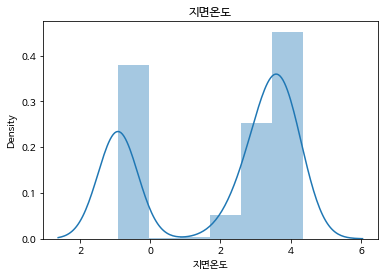

In [ ]:
sns.distplot(np.log(data4['지면온도']+13))
plt.title('지면온도')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


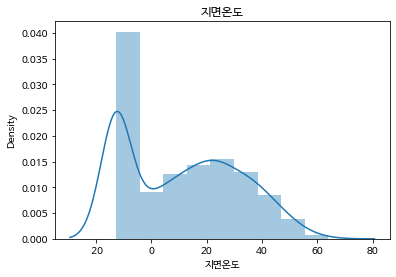

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


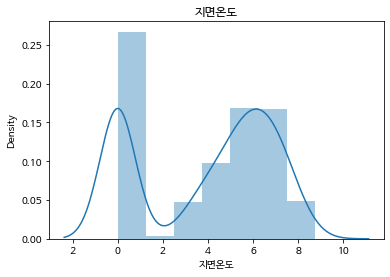

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


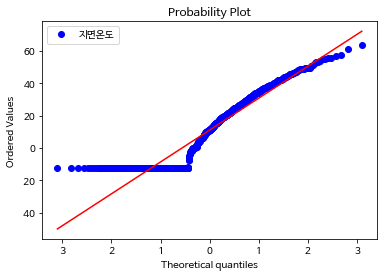

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


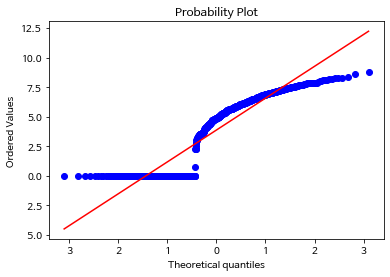

In [ ]:
# 지면온도
sns.distplot(data5['지면온도'])
plt.title('지면온도')
plt.show()

sns.distplot(np.sqrt(data5['지면온도']+12.6))
plt.title('지면온도')
plt.show()

stats.probplot(data5.지면온도 , dist=stats.norm,plot=plt)
plt.legend(['지면온도'])
plt.show()

stats.probplot(np.sqrt(data5.지면온도+12.6) , dist=stats.norm,plot=plt)
plt.show()

data5['지면온도sqrt']=np.sqrt(data4['지면온도']+12.6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


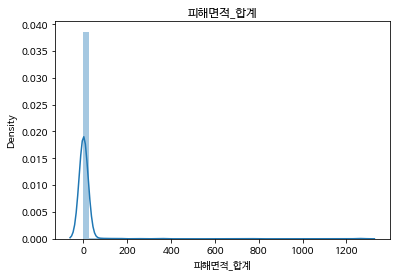

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


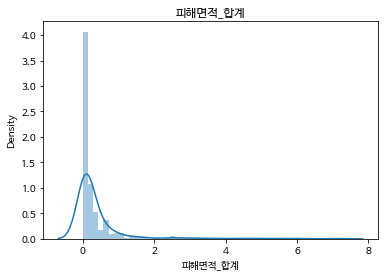

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


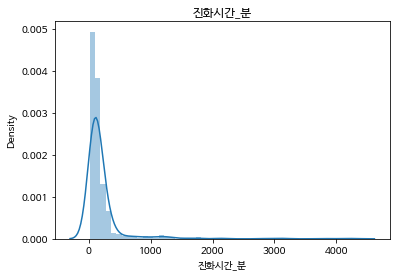

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


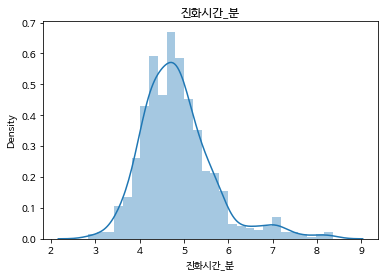

In [ ]:
# 피해면적_합계

sns.distplot(data5['피해면적_합계'])
plt.title('피해면적_합계')
plt.show()

sns.distplot(np.log1p(data5['피해면적_합계']))
plt.title('피해면적_합계')
plt.show()

# 진화시간_분

sns.distplot(data5['진화시간_분'])
plt.title('진화시간_분')
plt.show()


sns.distplot(np.log1p(data5['진화시간_분']))
plt.title('진화시간_분')
plt.show()

data5['진화시간_분log']=np.log1p(data4['진화시간_분'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


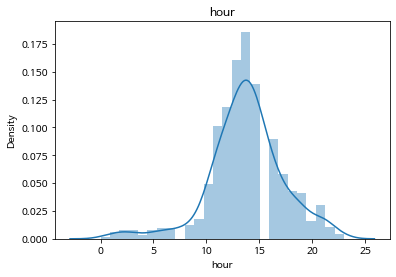

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


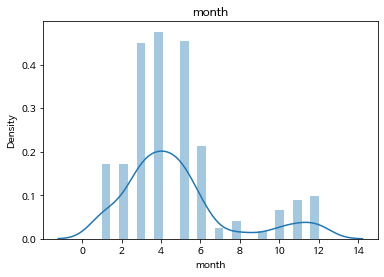

In [ ]:
# hour
sns.distplot(data5['hour'])
plt.title('hour')
plt.show()

# month
sns.distplot(data5['month'])
plt.title('month')
plt.show()

In [ ]:
data5.corr()

,year,month,day,hour,피해면적_합계,진화시간_분,기온,강수량,풍속,풍향,...,현지기압,해면기압,일조,지면온도,대형산불,강수량log,풍속log,습도log,지면온도sqrt,진화시간_분log
year,1.000000,-0.023795,-0.094155,-0.010603,0.068025,0.083549,-0.121646,0.099743,0.012269,0.027557,...,0.108694,0.081587,0.061833,0.000844,0.067213,0.114937,0.011315,-0.019063,0.016182,0.092301
month,-0.023795,1.000000,-0.038286,-0.049918,-0.029824,-0.051613,0.169536,-0.037704,-0.100662,-0.041171,...,-0.032204,-0.028841,-0.046597,0.067770,-0.086442,-0.033039,-0.105948,0.234037,0.026210,0.017653
day,-0.094155,-0.038286,1.000000,-0.047296,-0.086383,-0.019812,0.018014,-0.000129,-0.044632,-0.002961,...,0.081145,-0.032058,-0.049488,-0.095209,-0.097378,0.012756,-0.029047,0.018489,-0.092724,0.060970
hour,-0.010603,-0.049918,-0.047296,1.000000,0.079355,0.047039,0.122882,-0.029084,0.131938,0.125548,...,-0.034570,-0.058752,-0.058341,0.015123,0.048372,-0.022390,0.155444,-0.213977,0.011390,0.037588
피해면적_합계,0.068025,-0.029824,-0.086383,0.079355,1.000000,0.456960,-0.012657,-0.000317,0.238504,0.020289,...,0.021729,0.000601,-0.072229,-0.051851,0.633453,0.005567,0.168424,-0.060602,-0.052845,0.310128
진화시간_분,0.083549,-0.051613,-0.019812,0.047039,0.456960,1.000000,-0.047358,-0.015900,0.155068,0.009423,...,0.027454,-0.035958,-0.023509,-0.036970,0.758143,-0.018105,0.125805,-0.102212,-0.045659,0.765470
기온,-0.121646,0.169536,0.018014,0.122882,-0.012657,-0.047358,1.000000,0.024779,0.034932,0.059521,...,-0.389422,-0.268297,0.062973,0.439825,-0.078837,0.008163,0.102992,-0.146228,0.286329,0.072803
강수량,0.099743,-0.037704,-0.000129,-0.029084,-0.000317,-0.015900,0.024779,1.000000,0.054661,0.030797,...,-0.199751,0.121721,0.291355,0.256380,-0.022887,0.946200,0.063700,-0.069235,0.277377,-0.029811
풍속,0.012269,-0.100662,-0.044632,0.131938,0.238504,0.155068,0.034932,0.054661,1.000000,0.184133,...,-0.169054,-0.135464,0.013494,0.031855,0.224484,0.049938,0.961936,-0.259672,0.022638,0.060889
풍향,0.027557,-0.041171,-0.002961,0.125548,0.020289,0.009423,0.059521,0.030797,0.184133,1.000000,...,-0.024613,0.059416,0.138971,0.087029,0.073582,0.051787,0.243097,-0.280074,0.088180,-0.018626


### 표준화 - 연속형 (scaledata1)

In [ ]:
print(data5.columns)
print(data5.dtypes)

Index(['year', 'month', 'day', 'hour', '발생장소_시군구', '발생원인_구분', '피해면적_합계',
       '진화시간_분', '기온', '강수량', '풍속', '풍향', '습도', '이슬점온도', '현지기압', '해면기압', '일조',
       '지면온도', '대형산불', 'season', '강수량log', '풍속log', '습도log', '지면온도sqrt',
       '진화시간_분log'],
      dtype='object')
year           int64
month          int64
day            int64
hour           int64
발생장소_시군구      object
발생원인_구분       object
피해면적_합계      float64
진화시간_분       float64
기온           float64
강수량          float64
풍속           float64
풍향           float64
습도           float64
이슬점온도        float64
현지기압         float64
해면기압         float64
일조           float64
지면온도         float64
대형산불           int64
season        object
강수량log       float64
풍속log        float64
습도log        float64
지면온도sqrt     float64
진화시간_분log    float64
dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardization 평균 0 / 분산 1
# 연속형만
scaler = StandardScaler()
scaledata = scaler.fit_transform(data5[['month', 'hour',
       '기온', '강수량log','풍속log', '풍향',  '습도log',
       '이슬점온도', '현지기압','해면기압', '일조',
       '지면온도sqrt', '진화시간_분log','피해면적_합계']])
scaledata=pd.DataFrame(scaledata)
scaledata.columns= ['month', 'hour',
       '기온', '강수량log','풍속log', '풍향',  '습도log',
       '이슬점온도', '현지기압','해면기압', '일조',
       '지면온도sqrt', '진화시간_분log','피해면적_합계']

In [ ]:
scaledata

,month,hour,기온,강수량log,풍속log,풍향,습도log,이슬점온도,현지기압,해면기압,일조,지면온도sqrt,진화시간_분log,피해면적_합계
0,-1.369524,0.349541,-1.733242,1.836312,-0.768239,0.903362,-0.639386,-1.246855,1.017660,1.230934,0.982301,0.034809,-0.353352,-0.100830
1,-1.004758,0.628939,-0.771629,-0.530074,0.195658,0.424129,-1.369345,-1.218633,0.184987,-1.060745,-1.134651,0.259742,-2.139357,-0.098593
2,-1.004758,0.070142,-1.371345,-0.530074,0.668251,1.215904,-1.499159,-1.463230,0.097338,0.530043,0.982301,0.338399,-0.719048,-0.099909
3,-0.639993,0.349541,-1.164546,-0.530074,0.260332,0.709585,-0.747167,-0.898774,0.184987,-1.060745,-1.134651,-1.316010,-0.486700,-0.099909
4,-0.639993,0.908338,-0.275313,-0.530074,0.920790,0.698125,-0.026053,-0.898774,0.184987,-1.060745,-1.134651,-1.316010,-0.366046,-0.099909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,1.183834,0.070142,1.565193,3.661372,0.558907,-0.242628,1.255467,2.676116,-1.491313,0.183535,0.558911,1.300944,-0.303866,-0.101093
713,2.278130,2.025933,-0.523471,-0.530074,-1.089103,0.432464,1.368163,-0.898774,1.357302,-0.273226,-1.134651,-1.316010,1.051924,-0.084514
714,2.278130,-0.209257,-0.554491,-0.530074,-1.206862,0.488722,0.581402,-0.898774,1.357302,-0.273226,-1.134651,-1.316010,-0.123945,-0.095304
715,2.642896,0.349541,-0.947408,1.068042,0.384459,0.486638,-0.639386,-0.635361,-0.165612,1.538067,0.982301,0.310237,-1.144129,-0.101093


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


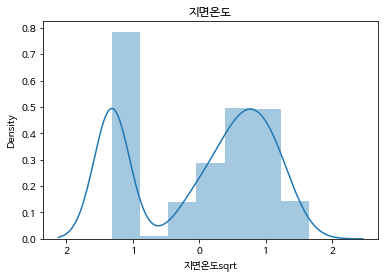

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


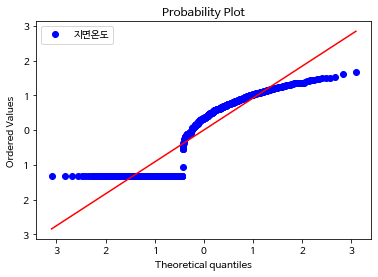

In [ ]:
sns.distplot(scaledata['지면온도sqrt'])
plt.title('지면온도')
plt.show()

stats.probplot(scaledata.지면온도sqrt , dist=stats.norm,plot=plt)
plt.legend(['지면온도'])
plt.show()

In [ ]:
data5.reset_index(inplace=True)

In [ ]:
scaledata1=pd.concat([data5[['발생장소_시군구','발생원인_구분', '대형산불', 'season']],
            scaledata],axis=1)

In [ ]:
scaledata1.reset_index(inplace=True)

In [ ]:
scaledata1

,index,발생장소_시군구,발생원인_구분,대형산불,season,month,hour,기온,강수량log,풍속log,풍향,습도log,이슬점온도,현지기압,해면기압,일조,지면온도sqrt,진화시간_분log,피해면적_합계
0,0,홍천,입,0,겨울,-1.369524,0.349541,-1.733242,1.836312,-0.768239,0.903362,-0.639386,-1.246855,1.017660,1.230934,0.982301,0.034809,-0.353352,-0.100830
1,1,고성,입,0,겨울,-1.004758,0.628939,-0.771629,-0.530074,0.195658,0.424129,-1.369345,-1.218633,0.184987,-1.060745,-1.134651,0.259742,-2.139357,-0.098593
2,2,원주,건,0,겨울,-1.004758,0.070142,-1.371345,-0.530074,0.668251,1.215904,-1.499159,-1.463230,0.097338,0.530043,0.982301,0.338399,-0.719048,-0.099909
3,3,횡성,건,0,봄,-0.639993,0.349541,-1.164546,-0.530074,0.260332,0.709585,-0.747167,-0.898774,0.184987,-1.060745,-1.134651,-1.316010,-0.486700,-0.099909
4,4,양구,건,0,봄,-0.639993,0.908338,-0.275313,-0.530074,0.920790,0.698125,-0.026053,-0.898774,0.184987,-1.060745,-1.134651,-1.316010,-0.366046,-0.099909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,712,춘천,기,0,여름,1.183834,0.070142,1.565193,3.661372,0.558907,-0.242628,1.255467,2.676116,-1.491313,0.183535,0.558911,1.300944,-0.303866,-0.101093
713,713,양양,쓰,0,가을,2.278130,2.025933,-0.523471,-0.530074,-1.089103,0.432464,1.368163,-0.898774,1.357302,-0.273226,-1.134651,-1.316010,1.051924,-0.084514
714,714,횡성,기,0,가을,2.278130,-0.209257,-0.554491,-0.530074,-1.206862,0.488722,0.581402,-0.898774,1.357302,-0.273226,-1.134651,-1.316010,-0.123945,-0.095304
715,715,강릉,기,0,겨울,2.642896,0.349541,-0.947408,1.068042,0.384459,0.486638,-0.639386,-0.635361,-0.165612,1.538067,0.982301,0.310237,-1.144129,-0.101093


### 기상관련변수들 pca (scaledata2)

In [ ]:
scaledata1.columns

Index(['index', '발생장소_시군구', '발생원인_구분', '대형산불', 'season', 'month', 'hour', '기온',
       '강수량log', '풍속log', '풍향', '습도log', '이슬점온도', '현지기압', '해면기압', '일조',
       '지면온도sqrt', '진화시간_분log', '피해면적_합계'],
      dtype='object')

In [ ]:
scaledata2=pd.DataFrame(scaledata1[['기온',
       '강수량log', '풍속log', '풍향', '습도log', '이슬점온도', '현지기압', '해면기압', '일조',
       '지면온도sqrt']])

#### 상관관계

In [ ]:
scaledata2.corr()

,기온,강수량log,풍속log,풍향,습도log,이슬점온도,현지기압,해면기압,일조,지면온도sqrt
기온,1.000000,0.008163,0.102992,0.059521,-0.146228,0.459851,-0.389422,-0.268297,0.062973,0.286329
강수량log,0.008163,1.000000,0.056797,0.051787,-0.097385,0.207671,-0.241453,0.179924,0.357525,0.348855
풍속log,0.102992,0.056797,1.000000,0.243097,-0.326413,-0.066801,-0.182266,-0.139993,0.045721,0.048025
풍향,0.059521,0.051787,0.243097,1.000000,-0.280074,-0.016850,-0.024613,0.059416,0.138971,0.088180
습도log,-0.146228,-0.097385,-0.326413,-0.280074,1.000000,0.246376,0.061290,-0.000008,-0.286464,-0.207925
이슬점온도,0.459851,0.207671,-0.066801,-0.016850,0.246376,1.000000,-0.626477,0.083804,0.432269,0.762481
현지기압,-0.389422,-0.241453,-0.182266,-0.024613,0.061290,-0.626477,1.000000,0.210958,-0.468090,-0.679832
해면기압,-0.268297,0.179924,-0.139993,0.059416,-0.000008,0.083804,0.210958,1.000000,0.343691,0.247520
일조,0.062973,0.357525,0.045721,0.138971,-0.286464,0.432269,-0.468090,0.343691,1.000000,0.796971
지면온도sqrt,0.286329,0.348855,0.048025,0.088180,-0.207925,0.762481,-0.679832,0.247520,0.796971,1.000000


In [ ]:
scaledata22=scaledata2
scaledata22.columns=[['기온',
       '강수량', '풍속', '풍향', '습도', '이슬점온도', '현지기압', '해면기압', '일조',
       '지면온도']]

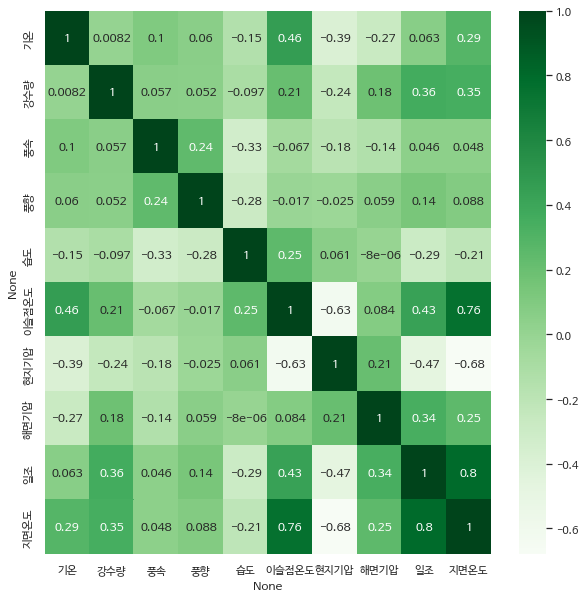

In [ ]:
plt.figure(figsize=(10,10))
sns.set(font="NanumBarunGothic",
rc={"axes.unicode_minus":False}, style='white')
sns.heatmap(data = scaledata2.corr(), annot = True, cmap='Greens')
plt.show()

#### pca

In [ ]:
eig = np.linalg.eig
matrix = np.matrix
testmatrix = scaledata2.corr()

#print(testmatrix) #Eigenvalue와 Eigenvector가 모두 나온다
print(eig(testmatrix)[0]) #Eigenvalue 부분을 출력한다
print(eig(testmatrix)[1]) #Eigenvector 부분을 출력한다.

[3.2793954  1.60807599 1.65436621 0.05397777 0.21797867 0.25194762
 0.59906192 0.70041311 0.77262367 0.86215965]
[[ 0.24416681  0.5046758   0.00408807  0.11433377  0.33248573 -0.14902985
  -0.50189736  0.44898609 -0.15149875  0.25178958]
 [ 0.2507317  -0.26185691 -0.05397262 -0.00596707 -0.03111536 -0.00705027
  -0.09567299  0.5568465   0.40008694 -0.62072308]
 [ 0.07930911  0.21339262 -0.51661756  0.01732304 -0.02833214 -0.14261766
  -0.44316576 -0.56133633  0.2787402  -0.26579483]
 [ 0.0851446  -0.04507929 -0.47275843  0.02645223  0.02390805  0.0242454
   0.29873071  0.19070985  0.55524846  0.57571471]
 [-0.11504045  0.03351669  0.61308688  0.25076461  0.30791935 -0.26601257
  -0.02722479 -0.22303586  0.57341007  0.04496233]
 [ 0.43696894  0.1306241   0.33979524 -0.5336613  -0.5401843  -0.01664219
  -0.14834805 -0.07308555  0.18142752  0.19849352]
 [-0.43589798 -0.28155128 -0.05885335  0.10212114 -0.43670415 -0.60182455
  -0.30446724  0.19950203 -0.04765976  0.17074328]
 [ 0.08648182

In [ ]:
scaledata2

,기온,강수량,풍속,풍향,습도,이슬점온도,현지기압,해면기압,일조,지면온도
0,-1.733242,1.836312,-0.768239,0.903362,-0.639386,-1.246855,1.017660,1.230934,0.982301,0.034809
1,-0.771629,-0.530074,0.195658,0.424129,-1.369345,-1.218633,0.184987,-1.060745,-1.134651,0.259742
2,-1.371345,-0.530074,0.668251,1.215904,-1.499159,-1.463230,0.097338,0.530043,0.982301,0.338399
3,-1.164546,-0.530074,0.260332,0.709585,-0.747167,-0.898774,0.184987,-1.060745,-1.134651,-1.316010
4,-0.275313,-0.530074,0.920790,0.698125,-0.026053,-0.898774,0.184987,-1.060745,-1.134651,-1.316010
...,...,...,...,...,...,...,...,...,...,...
712,1.565193,3.661372,0.558907,-0.242628,1.255467,2.676116,-1.491313,0.183535,0.558911,1.300944
713,-0.523471,-0.530074,-1.089103,0.432464,1.368163,-0.898774,1.357302,-0.273226,-1.134651,-1.316010
714,-0.554491,-0.530074,-1.206862,0.488722,0.581402,-0.898774,1.357302,-0.273226,-1.134651,-1.316010
715,-0.947408,1.068042,0.384459,0.486638,-0.639386,-0.635361,-0.165612,1.538067,0.982301,0.310237


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(scaledata2)
principalDf = pd.DataFrame(data=principalComponents, columns = ['pc1', 'pc2','pc3','pc4'])
principalDf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


,pc1,pc2,pc3,pc4
0,-0.309391,-1.037491,-3.140955,0.610966
1,-1.175337,-1.480339,0.529745,0.224066
2,-0.170344,-2.363897,-1.419721,-0.336296
3,-1.996645,-1.232245,0.562351,0.184501
4,-1.811076,-1.122291,1.176748,0.110323
...,...,...,...,...
712,3.937531,1.421183,0.342100,1.698125
713,-2.656986,0.863655,-0.161887,-0.686374
714,-2.578600,0.415415,-0.231577,-0.706877
715,0.699196,-1.086764,-2.094769,0.461801


In [ ]:
print('=============PCA result summary===============')
print(pca.singular_values_)
print(pca.components_.T)
print(np.sqrt(pca.explained_variance_))
print(pca.explained_variance_ratio_)
print(pca.noise_variance_)

=============PCA result summary===============
[48.49047848 34.44097231 33.95571355 24.86299396]
[[ 0.24416681  0.00408807  0.5046758  -0.25178958]
 [ 0.2507317  -0.05397262 -0.26185691  0.62072308]
 [ 0.07930911 -0.51661756  0.21339262  0.26579483]
 [ 0.0851446  -0.47275843 -0.04507929 -0.57571471]
 [-0.11504045  0.61308688  0.03351669 -0.04496233]
 [ 0.43696894  0.33979524  0.1306241  -0.19849352]
 [-0.43589798 -0.05885335 -0.28155128 -0.17074328]
 [ 0.08648182  0.04728721 -0.65158879 -0.27307806]
 [ 0.43534897 -0.08687859 -0.30961695 -0.00523719]
 [ 0.52228882  0.04573824 -0.10619316 -0.06353687]]
[1.81217426 1.28711957 1.2689846  0.92917371]
[0.32793954 0.16543662 0.1608076  0.08621596]
0.43327140852460344


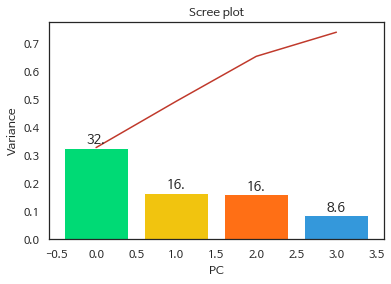

In [ ]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_

    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot

    for i in range(num_components): #라벨링(바 위에 텍스트(annotation) 쓰기)
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)

    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')

scree_plot(pca)

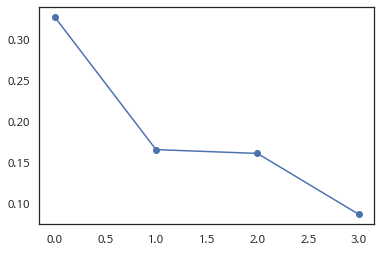

In [ ]:
plt.plot(pca.explained_variance_ratio_,'o-')
plt.show()

In [ ]:
sum(pca.explained_variance_ratio_)

0.7403997251015766

#### biplot

In [ ]:
scaledata2.columns

MultiIndex([(   '기온',),
            (  '강수량',),
            (   '풍속',),
            (   '풍향',),
            (   '습도',),
            ('이슬점온도',),
            ( '현지기압',),
            ( '해면기압',),
            (   '일조',),
            ( '지면온도',)],
           )

In [ ]:
pca_loading=pd.DataFrame(np.round(pca.components_.T,4),
                         columns=['pc1','pc2','pc3','pc4'],
                         index=['기온', '강수량', '풍속', '풍향', '습도',
                                '이슬점온도', '현지기압', '해면기압', '일조','지면온도'])
pca_loading

,pc1,pc2,pc3,pc4
기온,0.2442,0.0041,0.5047,-0.2518
강수량,0.2507,-0.0540,-0.2619,0.6207
풍속,0.0793,-0.5166,0.2134,0.2658
풍향,0.0851,-0.4728,-0.0451,-0.5757
습도,-0.1150,0.6131,0.0335,-0.0450
이슬점온도,0.4370,0.3398,0.1306,-0.1985
현지기압,-0.4359,-0.0589,-0.2816,-0.1707
해면기압,0.0865,0.0473,-0.6516,-0.2731
일조,0.4353,-0.0869,-0.3096,-0.0052
지면온도,0.5223,0.0457,-0.1062,-0.0635


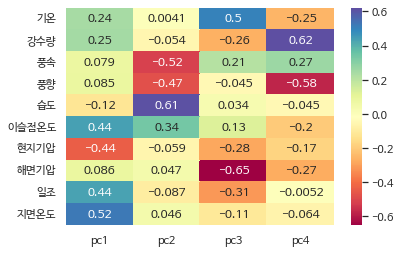

In [ ]:
ax = sns.heatmap(pca_loading, annot=True, cmap='Spectral')
plt.show()

In [ ]:
#해면보정 : 수온의 온도 0도 일 때 기압 환산 -> 지질학적 외적 요인 베재 -> 해면 고도에 맞추어서 기압값 환산

In [ ]:
scaledata2['pc1']=principalDf.pc1
scaledata2['pc2']=principalDf.pc2
scaledata2['pc3']=principalDf.pc3
scaledata2['pc4']=principalDf.pc4
scaledata2

,기온,강수량,풍속,풍향,습도,이슬점온도,현지기압,해면기압,일조,지면온도,pc1,pc2,pc3,pc4
0,-1.733242,1.836312,-0.768239,0.903362,-0.639386,-1.246855,1.017660,1.230934,0.982301,0.034809,-0.309391,-1.037491,-3.140955,0.610966
1,-0.771629,-0.530074,0.195658,0.424129,-1.369345,-1.218633,0.184987,-1.060745,-1.134651,0.259742,-1.175337,-1.480339,0.529745,0.224066
2,-1.371345,-0.530074,0.668251,1.215904,-1.499159,-1.463230,0.097338,0.530043,0.982301,0.338399,-0.170344,-2.363897,-1.419721,-0.336296
3,-1.164546,-0.530074,0.260332,0.709585,-0.747167,-0.898774,0.184987,-1.060745,-1.134651,-1.316010,-1.996645,-1.232245,0.562351,0.184501
4,-0.275313,-0.530074,0.920790,0.698125,-0.026053,-0.898774,0.184987,-1.060745,-1.134651,-1.316010,-1.811076,-1.122291,1.176748,0.110323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,1.565193,3.661372,0.558907,-0.242628,1.255467,2.676116,-1.491313,0.183535,0.558911,1.300944,3.937531,1.421183,0.342100,1.698125
713,-0.523471,-0.530074,-1.089103,0.432464,1.368163,-0.898774,1.357302,-0.273226,-1.134651,-1.316010,-2.656986,0.863655,-0.161887,-0.686374
714,-0.554491,-0.530074,-1.206862,0.488722,0.581402,-0.898774,1.357302,-0.273226,-1.134651,-1.316010,-2.578600,0.415415,-0.231577,-0.706877
715,-0.947408,1.068042,0.384459,0.486638,-0.639386,-0.635361,-0.165612,1.538067,0.982301,0.310237,0.699196,-1.086764,-2.094769,0.461801


In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


features = ['기온', '강수량', '풍속', '풍향', '습도', '이슬점온도', '현지기압', '해면기압', '일조',
       '지면온도']
X = scaledata2[features]

pca = PCA(n_components=4)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

#fig = px.scatter(components, x=0, y=1, color=df['species'])
fig = px.scatter(components, x=0, y=1)

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


**해면기압 : 현지기압을 그 지점에서 지구의 평균해면에서 관측된 값으로 환산하여 산출한 기압.    
**기압과 온도    
고도가 같다면 기압은 어느 지역이든 같아야 하는데 어떻게 기압이 높고 낮음이 생길 수 있는 걸까. 이유는 태양으로부터 받는 에너지의 차이 때문이다. 지구가 태양으로부터 받는 에너지의 양은 지역에 따라 다르다. 그래서 공기의 밀도 또한 지역에 따라 다르게 나타난다. 태양에너지를 많이 받으면 공기의 밀도가 낮아져 주변보다 기압이 낮아지게 되고, 태양에너지를 적게 받으면 공기의 밀도가 높아져 주변보다 기압이 높아지게 된다.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



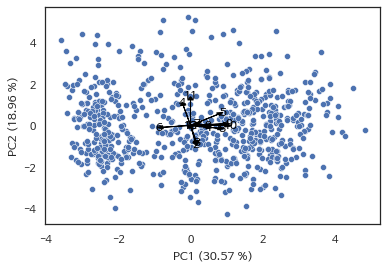

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=4)),])

pca_data = pd.DataFrame(
    pipeline.fit_transform(scaledata2),
    columns = ['pc1', 'pc2','pc3','pc4']
)

pca_step = pipeline.steps[1][1]
loadings = pd.DataFrame(
    pca_step.components_.T,
    columns = ['pc1', 'pc2','pc3','pc4']
)


def loading_plot(
    coeff, labels, scale=1, colors=None, visible=None, ax=plt, arrow_size=0.5
):
    for i, label in enumerate(labels):
        if visible is None or visible[i]:
            ax.arrow(
                0,
                0,
                coeff[i, 0] * scale,
                coeff[i, 1] * scale,
                head_width=arrow_size * scale,
                head_length=arrow_size * scale,
                color="#000" if colors is None else colors[i],
            )
            ax.text(
                coeff[i, 0] * 1.15 * scale,
                coeff[i, 1] * 1.15 * scale,
                label,
                color="#000" if colors is None else colors[i],
                ha="center",
                va="center",
            )


g = sns.scatterplot(data=pca_data, x="pc1", y="pc2")

# Add loadings
loading_plot(loadings[["pc1", "pc2"]].values, loadings.index, scale=2, arrow_size=0.08)


# Add variance explained by the
g.set_xlabel(f"PC1 ({pca_step.explained_variance_ratio_[0]*100:.2f} %)")
g.set_ylabel(f"PC2 ({pca_step.explained_variance_ratio_[1]*100:.2f} %)")

plt.savefig("PCA_with_loadings.png", dpi=200)
plt.show()

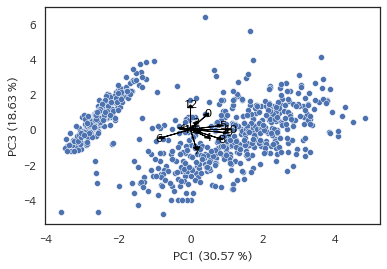

In [ ]:
g = sns.scatterplot(data=pca_data, x="pc1", y="pc3")

# Add loadings
loading_plot(loadings[["pc1", "pc3"]].values, loadings.index, scale=2, arrow_size=0.08)


# Add variance explained by the
g.set_xlabel(f"PC1 ({pca_step.explained_variance_ratio_[0]*100:.2f} %)")
g.set_ylabel(f"PC3 ({pca_step.explained_variance_ratio_[2]*100:.2f} %)")

plt.savefig("PCA_with_loadings.png", dpi=200)
plt.show()

## Clustering

### k-means (data7

In [ ]:
print(scaledata1.columns)
print(scaledata2.columns)

Index(['index', '발생장소_시군구', '발생원인_구분', '대형산불', 'season', 'month', 'hour', '기온',
       '강수량log', '풍속log', '풍향', '습도log', '이슬점온도', '현지기압', '해면기압', '일조',
       '지면온도sqrt', '진화시간_분log', '피해면적_합계'],
      dtype='object')
MultiIndex([(   '기온',),
            (  '강수량',),
            (   '풍속',),
            (   '풍향',),
            (   '습도',),
            ('이슬점온도',),
            ( '현지기압',),
            ( '해면기압',),
            (   '일조',),
            ( '지면온도',),
            (  'pc1',),
            (  'pc2',),
            (  'pc3',),
            (  'pc4',)],
           )


In [ ]:
# year - 10년 기후변화 패턴 찾기는 짧은 - 제거
data7 = pd.concat( [ scaledata2[['pc1','pc2','pc3','pc4']],
                    scaledata1[[ 'season', 'hour','month',
                                '진화시간_분log', '피해면적_합계', '발생장소_시군구', '발생원인_구분']] ],
                  axis=1)
data7.head(3)

data7.columns=['pc1','pc2','pc3','pc4','season', 'hour','month',
                                '진화시간_분', '피해면적_합계', '발생장소_시군구', '발생원인_구분']

In [ ]:
from sklearn.preprocessing import StandardScaler

kdata = data7[['pc1','pc2']] # 2가지 feature 대상

scaler = StandardScaler()
data_scale = scaler.fit_transform(kdata)

In [ ]:
from sklearn.cluster import KMeans

k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지
kdata['cluster']=model.fit_predict(data_scale)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# The lowest SSE value
model.inertia_
model.cluster_centers_

array([[ 0.93627786,  0.55460305],
       [-1.06567086, -0.44058361],
       [ 0.60729927, -0.93711672],
       [-0.76957899,  1.36520074]])

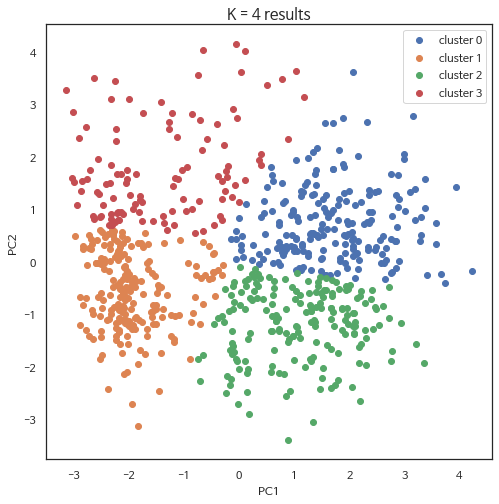

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(kdata.loc[kdata['cluster'] == i, 'pc1'],
                kdata.loc[kdata['cluster'] == i, 'pc2'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('PC1', size = 12)
plt.ylabel('PC2', size = 12)
plt.show()

#### 실루엣

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_scale)
    sse.append(kmeans.inertia_)

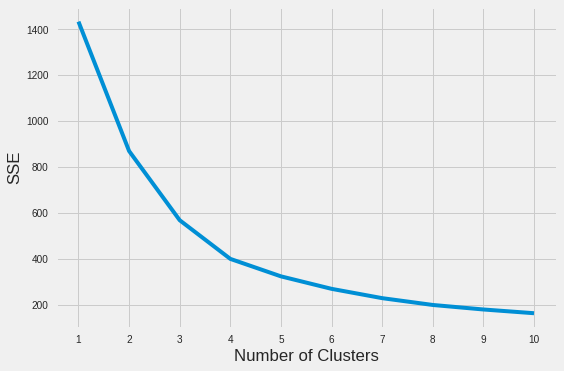

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kneed import DataGenerator, KneeLocator
kl = KneeLocator(
range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

#### cluster

In [ ]:
kkk=pd.concat([kdata,scaledata1],axis=1)

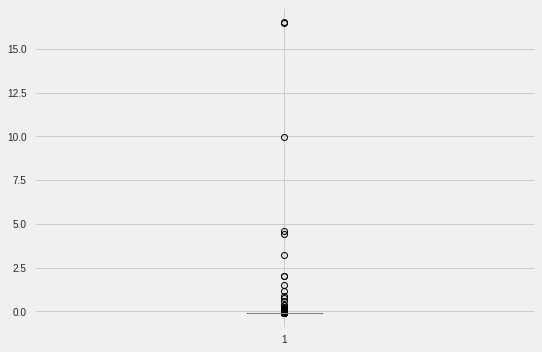

In [ ]:
plt.boxplot(kkk['피해면적_합계'])
plt.show()

In [ ]:
print(kkk[kkk['cluster']==0].groupby('발생장소_시군구').size())
print(kkk[kkk['cluster']==0].groupby('season').size())

발생장소_시군구
강릉    21
고성     2
동해     2
속초     4
영월    11
원주    24
인제    22
정선    15
철원    14
춘천    59
태백     2
홍천    32
dtype: int64
season
가을     22
겨울     12
봄     120
여름     54
dtype: int64


In [ ]:
kkk.groupby(['cluster']).size()

cluster
0    208
1    209
2    188
3    112
dtype: int64

In [ ]:
kkk[kkk['대형산불']==1].groupby(['cluster']).size()

cluster
1    9
2    5
3    1
dtype: int64

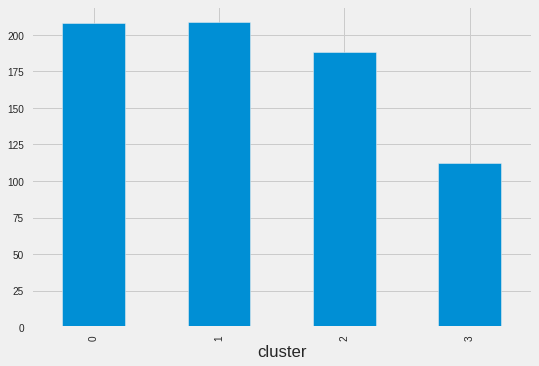

In [ ]:
kkk.groupby(['cluster']).size().plot(kind='bar')
plt.show()

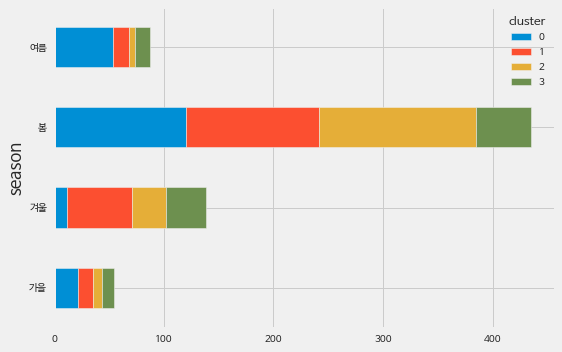

In [ ]:
plt.rc('font', family='NanumBarunGothic')
aa=kkk.groupby(['season','cluster'])

#aa.size().sort_values().unstack().plot(kind='barh',stacked=True)
aa.size().loc[['봄','여름','가을','겨울']].sort_values().unstack().plot(kind='barh',stacked=True)

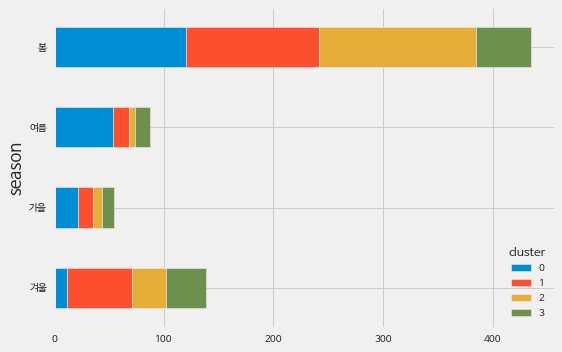

In [ ]:
aa.size().unstack().loc[['겨울','가을','여름','봄']].plot(kind='barh',stacked=True)

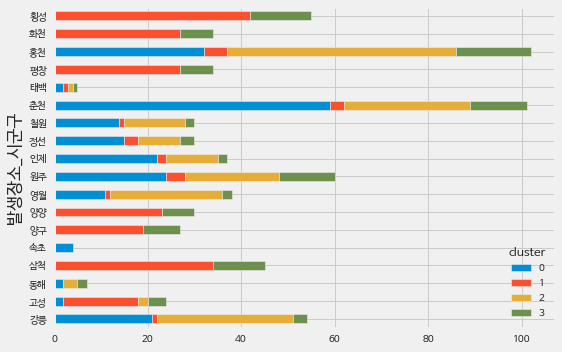

In [ ]:
#plt.rc('font', family='NanumBarunGothic')
aa=kkk.groupby(['발생장소_시군구','cluster'])
aa.size().unstack().plot(kind='barh',stacked=True)

In [ ]:
aa=kkk[kkk['대형산불']==1].groupby(['발생장소_시군구','cluster'])
aa.size()

발생장소_시군구  cluster
강릉        2          3
고성        1          3
삼척        1          4
양양        1          1
인제        2          1
춘천        3          1
홍천        2          1
화천        1          1
dtype: int64

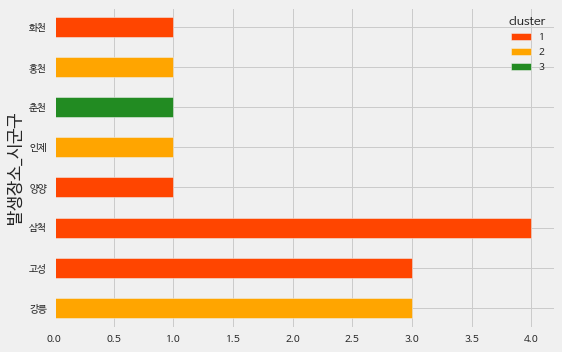

In [ ]:

#plt.rc('font', family='NanumBarunGothic')

#colors = ['dodgerblue','orangered','orange']
colors = {0:'dodgerblue',1:'orangered',2:'orange',3:'forestgreen'}
#colors = {2:'gold', 1:'orangered', 0:'deepskyblue'}

aa=kkk[kkk['대형산불']==1].groupby(['발생장소_시군구','cluster'])
aa.size().unstack().plot(kind='barh',stacked=True,color=colors)

In [ ]:
print(kkk[kkk['cluster']==1].groupby('발생장소_시군구').size())
print(kkk[kkk['cluster']==1].groupby('season').size())

발생장소_시군구
강릉     1
고성    16
삼척    34
양구    19
양양    23
영월     1
원주     4
인제     2
정선     3
철원     1
춘천     3
태백     1
평창    27
홍천     5
화천    27
횡성    42
dtype: int64
season
가을     14
겨울     59
봄     122
여름     14
dtype: int64


In [ ]:
print(kkk[kkk['cluster']==2].groupby('발생장소_시군구').size())
print(kkk[kkk['cluster']==2].groupby('season').size())

발생장소_시군구
강릉    29
고성     2
동해     3
영월    24
원주    20
인제    11
정선     9
철원    13
춘천    27
태백     1
홍천    49
dtype: int64
season
가을      8
겨울     31
봄     143
여름      6
dtype: int64


In [ ]:
print(kkk[kkk['cluster']==3].groupby('발생장소_시군구').size())
print(kkk[kkk['cluster']==3].groupby('season').size())

발생장소_시군구
강릉     3
고성     4
동해     2
삼척    11
양구     8
양양     7
영월     2
원주    12
인제     2
정선     3
철원     2
춘천    12
태백     1
평창     7
홍천    16
화천     7
횡성    13
dtype: int64
season
가을    11
겨울    37
봄     50
여름    14
dtype: int64


In [ ]:
kkk[(kkk['대형산불']==1)&(kkk['cluster']==0)]

,pc1,pc2,cluster,index,발생장소_시군구,발생원인_구분,대형산불,season,month,hour,...,풍속log,풍향,습도log,이슬점온도,현지기압,해면기압,일조,지면온도sqrt,진화시간_분log,피해면적_합계


In [ ]:
kkk[(kkk['대형산불']==1)&(kkk['cluster']==1)]

,pc1,pc2,cluster,index,발생장소_시군구,발생원인_구분,대형산불,season,month,hour,...,풍속log,풍향,습도log,이슬점온도,현지기압,해면기압,일조,지면온도sqrt,진화시간_분log,피해면적_합계
155,-2.531438,-1.857509,1,155,삼척,기,1,겨울,-1.004758,-0.209257,...,0.668251,0.928365,-1.200623,-0.898774,1.466864,-0.107847,-1.134651,-1.31601,4.200838,0.582998
179,-1.937843,-2.715991,1,179,화천,쓰,1,봄,-0.639993,0.070142,...,0.872456,0.787721,-2.549123,-0.898774,1.466864,-0.107847,-1.134651,-1.31601,2.738378,0.784317
435,-2.006983,0.048253,1,435,삼척,입,1,봄,0.089538,-0.768054,...,0.323234,-0.819790,0.216581,-0.898774,0.513674,-0.792988,-1.134651,-1.31601,4.255340,9.966317
478,-2.641311,-1.480539,1,478,삼척,건,1,겨울,-1.004758,0.628939,...,0.060572,0.624157,-1.319677,-0.898774,1.685989,-0.013345,-1.134651,-1.31601,3.884881,2.019075
479,-2.778507,-1.310584,1,479,삼척,기,1,겨울,-1.004758,2.025933,...,1.233321,0.920030,0.176178,-0.898774,1.685989,-0.013345,-1.134651,-1.31601,3.758731,0.904845
488,-2.225277,-1.489876,1,488,고성,기,1,봄,-0.639993,-2.165048,...,2.286113,0.573108,0.488738,-0.898774,1.685989,-0.013345,-1.134651,-1.31601,2.414995,4.594251
518,-2.491220,-1.794047,1,518,양양,담,1,겨울,-1.369524,0.628939,...,1.274687,0.461635,-0.940723,-0.898774,1.521645,-0.139348,-1.134651,-1.31601,2.986200,1.187482
551,-2.089371,-2.154053,1,551,고성,기,1,봄,-0.275227,1.467136,...,2.439222,0.387666,-0.613320,-0.898774,1.521645,-0.139348,-1.134651,-1.31601,2.863732,16.565116
645,-1.744781,-0.620452,1,645,고성,건,1,봄,0.089538,1.746534,...,1.104551,0.351203,0.692662,-0.898774,0.678017,-0.737862,-1.134651,-1.31601,2.172162,1.519856


In [ ]:
kkk[(kkk['대형산불']==1)&(kkk['cluster']==2)]

,pc1,pc2,cluster,index,발생장소_시군구,발생원인_구분,대형산불,season,month,hour,...,풍속log,풍향,습도log,이슬점온도,현지기압,해면기압,일조,지면온도sqrt,진화시간_분log,피해면적_합계
184,0.172558,-2.911511,2,184,홍천,입,1,봄,-0.639993,-0.209257,...,1.581248,0.695000,-2.123014,-1.312709,0.272637,0.766298,0.982301,0.456355,3.151882,0.386942
378,0.861693,-1.370593,2,378,강릉,입,1,봄,-0.639993,-1.047453,...,1.433081,0.903362,-0.173134,-0.494247,-1.020196,0.931677,0.982301,0.615380,3.422667,2.009470
438,2.198322,-2.670476,2,438,강릉,입,1,봄,0.089538,0.349541,...,2.093538,1.215904,-1.786996,-0.099128,-1.370795,0.695422,0.982301,1.208855,4.100336,3.214622
549,1.963860,-0.887267,2,549,인제,쓰,1,봄,-0.275227,0.070142,...,1.686417,-0.450990,-0.243717,0.295992,-0.680554,-0.422855,0.982301,0.685849,3.849539,4.437406
552,0.727595,-2.132333,2,552,강릉,기,1,봄,-0.275227,2.584731,...,2.439222,0.278276,-1.247403,-0.447209,-1.502270,0.593044,-1.134651,0.303120,2.810129,16.479983


In [ ]:
kkk[(kkk['대형산불']==1)&(kkk['cluster']==3)]

,pc1,pc2,cluster,index,발생장소_시군구,발생원인_구분,대형산불,season,month,hour,...,풍속log,풍향,습도log,이슬점온도,현지기압,해면기압,일조,지면온도sqrt,진화시간_분log,피해면적_합계
598,-0.308085,0.799742,3,598,춘천,담,1,겨울,-1.369524,-0.209257,...,-1.330989,0.695,0.798088,-0.080312,0.43698,1.48294,0.982301,-0.076659,3.084899,0.349573


### dbscans - pc1 pc3

minPts : 반경 내 최소 개체(point) 수  
eps(epsilon) : 군집화할 반경  
Core : 중심점(minPts를 만족할 경우)  
Border : 경계점(minPts를 만족하진 않지만, 어느 Core 반경에 속한 경우)  
Noise : 어느 군집에도 속하지 않는 점  

In [ ]:
from sklearn.cluster import DBSCAN
feature=data7[['pc1', 'pc3']]

# create model and prediction
model = DBSCAN(eps=0.7,min_samples=15) #0.7 10
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)

          pc1       pc3  predict
0   -0.309391 -3.140955        0
1   -1.175337  0.529745        0
2   -0.170344 -1.419721        0
3   -1.996645  0.562351        1
4   -1.811076  1.176748        1
..        ...       ...      ...
712  3.937531  0.342100        0
713 -2.656986 -0.161887        1
714 -2.578600 -0.231577        1
715  0.699196 -2.094769        0
716 -1.415257 -2.372780        0

[717 rows x 3 columns]


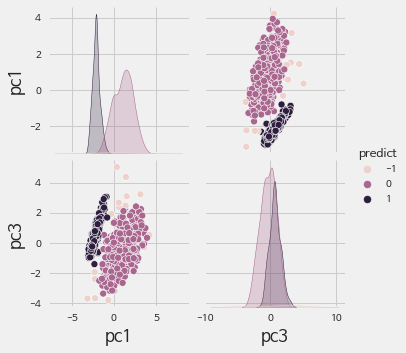

In [ ]:
#pairplot with Seaborn
sns.pairplot(r,hue='predict')
plt.show()

In [ ]:
rr=pd.concat([r,data7],axis=1)
rrr=pd.concat([rr[['pc1','pc3','predict']], data3], axis=1)

In [ ]:
sum(rrr['대형산불'])

15

In [ ]:
print(sum(rrr[rrr['predict']==1]['대형산불']))
print(sum(rrr[rrr['predict']==0]['대형산불']))
print(sum(rrr[rrr['predict']==-1]['대형산불']))

9
6
0


In [ ]:
rrr=rrr[['predict', 'year', 'month', 'day', 'hour',
       '진화시간_분', '발생장소_시군구', '발생원인_구분', '피해면적_합계', '기온', '강수량',
       '풍속', '풍향', '습도', '이슬점온도', '현지기압', '해면기압', '일조', '지면온도', '대형산불',
       'season', '강수량log', '풍속log', '습도log', '지면온도sqrt', '진화시간_분log']]

In [ ]:
r0 = rrr[(rrr['predict']==0)]
r0

,predict,year,month,day,hour,진화시간_분,발생장소_시군구,발생원인_구분,피해면적_합계,기온,...,해면기압,일조,지면온도,대형산불,season,강수량log,풍속log,습도log,지면온도sqrt,진화시간_분log
0,0,2012,1,11,15,95.0,홍천,입,0.03,-0.9,...,1011.5,1.0,3.2,0,겨울,1.098612,0.832909,3.135494,3.974921,4.564348
1,0,2012,2,5,16,21.0,고성,입,0.20,8.4,...,982.4,0.0,8.9,0,겨울,0.000000,1.252763,2.772589,4.636809,3.091042
2,0,2012,2,16,14,70.0,원주,건,0.10,2.6,...,1002.6,1.0,11.1,0,겨울,0.000000,1.458615,2.708050,4.868265,4.262680
5,0,2012,4,9,16,111.0,춘천,입,0.02,24.2,...,1007.8,1.0,29.3,0,봄,1.193922,1.131402,2.564949,6.473021,4.718499
8,0,2012,4,17,15,55.0,영월,건,0.10,20.3,...,984.8,0.9,39.1,0,봄,0.000000,0.993252,3.218876,7.190271,4.025352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0,2021,6,7,15,107.0,강릉,쓰,0.01,29.2,...,1008.4,0.1,28.1,0,여름,0.000000,1.386294,3.713572,6.379655,4.682131
710,0,2021,6,8,14,128.0,홍천,기,0.04,28.5,...,999.8,0.8,40.2,0,여름,0.000000,0.916291,3.637586,7.266361,4.859812
712,0,2021,8,10,14,99.0,춘천,기,0.01,31.0,...,998.2,0.8,46.7,0,여름,1.945910,1.410987,4.077537,7.700649,4.605170
715,0,2021,12,19,15,49.0,강릉,기,0.01,6.7,...,1015.4,1.0,10.3,0,겨울,0.741937,1.335001,3.135494,4.785394,3.912023


In [ ]:
r1 = rrr[(rrr['predict']==1)]
r1

,predict,year,month,day,hour,진화시간_분,발생장소_시군구,발생원인_구분,피해면적_합계,기온,...,해면기압,일조,지면온도,대형산불,season,강수량log,풍속log,습도log,지면온도sqrt,진화시간_분log
3,1,2012,3,12,15,85.0,횡성,건,0.10,4.6,...,982.4,0.0,-12.6,0,봄,0.0,1.280934,3.081910,0.0,4.454347
4,1,2012,3,30,17,94.0,양구,건,0.10,13.2,...,982.4,0.0,-12.6,0,봄,0.0,1.568616,3.440418,0.0,4.553877
6,1,2012,4,15,15,80.0,평창,담,0.12,22.6,...,982.4,0.0,-12.6,0,봄,0.0,1.435085,2.975530,0.0,4.394449
7,1,2012,4,15,20,93.0,삼척,기,0.03,14.0,...,1023.5,0.0,-12.6,0,봄,0.0,0.262364,4.415220,0.0,4.543295
11,1,2012,4,19,15,220.0,횡성,입,1.50,24.3,...,982.4,0.0,-12.6,0,봄,0.0,1.526056,2.923162,0.0,5.398163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,2021,5,7,11,144.0,삼척,입,1.23,26.0,...,992.4,0.0,-12.6,0,봄,0.0,1.987874,3.546740,0.0,4.976734
703,1,2021,5,8,12,228.0,횡성,입,0.01,18.0,...,992.4,0.0,-12.6,0,봄,0.0,1.609438,3.919991,0.0,5.433722
708,1,2021,5,14,11,127.0,횡성,기,0.10,26.0,...,992.4,0.0,-12.6,0,봄,0.0,0.955511,4.007333,0.0,4.852030
713,1,2021,11,14,21,305.0,양양,쓰,1.27,10.8,...,992.4,0.0,-12.6,0,가을,0.0,0.693147,4.133565,0.0,5.723585


In [ ]:
r_1 = rrr[(rrr['predict']==-1)]
r_1

,predict,year,month,day,hour,진화시간_분,발생장소_시군구,발생원인_구분,피해면적_합계,기온,...,해면기압,일조,지면온도,대형산불,season,강수량log,풍속log,습도log,지면온도sqrt,진화시간_분log
42,-1,2012,12,26,12,300.0,삼척,쓰,0.20,-2.4,...,1023.5,0.0,-12.6,0,겨울,0.000000,1.131402,3.342862,0.000000,5.707110
59,-1,2013,4,29,9,55.0,태백,쓰,0.07,14.4,...,926.5,0.0,13.5,0,봄,0.000000,2.128232,4.234107,5.108816,4.025352
70,-1,2013,6,7,15,88.0,춘천,입,0.02,31.3,...,1000.9,1.0,48.0,0,여름,1.686399,0.993252,3.367296,7.784600,4.488636
133,-1,2014,5,13,11,131.0,고성,기,0.50,26.4,...,979.2,0.0,24.4,0,봄,0.000000,1.945910,3.449988,6.082763,4.882802
134,-1,2014,5,14,18,76.0,정선,입,0.10,24.2,...,962.2,0.2,24.8,0,봄,0.000000,0.788457,3.295837,6.115554,4.343805
173,-1,2015,3,16,15,86.0,태백,건,0.50,17.4,...,934.4,1.0,18.2,0,봄,0.405465,1.029619,2.197225,5.549775,4.465908
275,-1,2015,12,19,20,56.0,인제,기,0.01,-4.3,...,1010.3,0.0,-0.3,0,겨울,0.405465,0.095310,4.394449,3.507136,4.043051
283,-1,2016,1,26,3,182.0,춘천,기,0.10,-14.4,...,1019.7,1.0,-12.0,0,겨울,0.182322,0.336472,4.290459,0.774597,5.209486
476,-1,2018,2,9,6,105.0,춘천,기,0.01,-10.4,...,1015.0,0.9,-7.6,0,겨울,1.791759,0.587787,4.290459,2.236068,4.663439
502,-1,2018,6,24,16,198.0,홍천,입,1.00,33.3,...,990.1,1.0,49.5,0,여름,2.140066,1.481605,3.465736,7.880355,5.293305


In [ ]:
r0[ r0['대형산불']==1 ]

,predict,year,month,day,hour,진화시간_분,발생장소_시군구,발생원인_구분,피해면적_합계,기온,...,해면기압,일조,지면온도,대형산불,season,강수량log,풍속log,습도log,지면온도sqrt,진화시간_분log
184,0,2015,3,23,13,1729.0,홍천,입,37.10,9.4,...,1005.6,1.0,14.6,1,봄,0.000000,1.856298,2.397895,5.215362,7.455877
378,0,2017,3,9,10,2162.0,강릉,입,160.41,5.0,...,1007.7,1.0,19.7,1,봄,0.000000,1.791759,3.367296,5.683309,7.679251
438,0,2017,5,6,15,3782.0,강릉,입,252.00,23.1,...,1004.7,1.0,42.6,1,봄,0.000000,2.079442,2.564949,7.429670,8.238273
549,0,2019,4,4,14,3075.0,인제,쓰,344.93,15.3,...,990.5,1.0,22.1,1,봄,1.504077,1.902108,3.332205,5.890671,8.031385
552,0,2019,4,4,23,1304.0,강릉,기,1260.15,13.9,...,1003.4,0.0,10.1,1,봄,0.693147,2.230014,2.833213,4.764452,7.173958
598,0,2020,1,4,13,1636.0,춘천,담,34.26,2.9,...,1014.7,1.0,0.7,1,겨울,0.000000,0.587787,3.850148,3.646917,7.400621


In [ ]:
r1[ r1['대형산불']==1 ]

,predict,year,month,day,hour,진화시간_분,발생장소_시군구,발생원인_구분,피해면적_합계,기온,...,해면기압,일조,지면온도,대형산불,season,강수량log,풍속log,습도log,지면온도sqrt,진화시간_분log
155,1,2015,2,8,13,4109.0,삼척,기,52.00,-1.8,...,994.5,0.0,-12.6,1,겨울,0.0,1.458615,2.856470,0.0,8.321178
179,1,2015,3,22,14,1229.0,화천,쓰,67.30,15.4,...,994.5,0.0,-12.6,1,봄,0.0,1.547563,2.186051,0.0,7.114769
435,1,2017,5,6,11,4298.0,삼척,입,765.12,18.3,...,985.8,0.0,-12.6,1,봄,0.0,1.308333,3.561046,0.0,8.366138
478,1,2018,2,11,16,3166.0,삼척,건,161.14,-0.3,...,995.7,0.0,-12.6,1,겨울,0.0,1.193922,2.797281,0.0,8.060540
479,1,2018,2,11,21,2853.0,삼척,기,76.46,-3.6,...,995.7,0.0,-12.6,1,겨울,0.0,1.704748,3.540959,0.0,7.956477
488,1,2018,3,28,6,941.0,고성,기,356.85,17.6,...,995.7,0.0,-12.6,1,봄,0.0,2.163323,3.696351,0.0,6.848005
518,1,2019,1,1,16,1508.0,양양,담,97.94,1.7,...,994.1,0.0,-12.6,1,겨울,0.0,1.722767,2.985682,0.0,7.319202
551,1,2019,4,4,19,1363.0,고성,기,1266.62,15.7,...,994.1,0.0,-12.6,1,봄,0.0,2.230014,3.148453,0.0,7.218177
645,1,2020,5,1,20,770.0,고성,건,123.20,27.1,...,986.5,0.0,-12.6,1,봄,0.0,1.648659,3.797734,0.0,6.647688


In [ ]:
r0.groupby('발생원인_구분').size()

발생원인_구분
건     20
기    165
담     26
쓰     46
입    205
dtype: int64

In [ ]:
r1.groupby('발생원인_구분').size()

발생원인_구분
건    19
기    98
담     8
쓰    30
입    85
dtype: int64

In [ ]:
r_1.groupby('발생원인_구분').size()

발생원인_구분
건    2
기    8
쓰    2
입    3
dtype: int64

In [ ]:
r0.groupby('발생장소_시군구').size()

발생장소_시군구
강릉     54
고성      9
동해      7
속초      4
영월     37
원주     60
인제     36
정선     27
철원     30
춘천     97
홍천    101
dtype: int64

In [ ]:
r1.groupby('발생장소_시군구').size()

발생장소_시군구
고성    14
삼척    44
양구    27
양양    30
정선     1
태백     1
평창    34
화천    34
횡성    55
dtype: int64

In [ ]:
r_1.groupby('발생장소_시군구').size()

발생장소_시군구
고성    1
삼척    1
영월    1
인제    1
정선    2
춘천    4
태백    4
홍천    1
dtype: int64

In [ ]:
r0[r0['대형산불']==1].groupby('발생장소_시군구').size()

발생장소_시군구
강릉    3
인제    1
춘천    1
홍천    1
dtype: int64

In [ ]:
r1[r1['대형산불']==1].groupby('발생장소_시군구').size()

발생장소_시군구
고성    3
삼척    4
양양    1
화천    1
dtype: int64

In [ ]:
rrr[(rrr['predict']==0) & (rrr['대형산불']==1)]

,predict,year,month,day,hour,진화시간_분,발생장소_시군구,발생원인_구분,피해면적_합계,기온,...,해면기압,일조,지면온도,대형산불,season,강수량log,풍속log,습도log,지면온도sqrt,진화시간_분log
184,0,2015,3,23,13,1729.0,홍천,입,37.10,9.4,...,1005.6,1.0,14.6,1,봄,0.000000,1.856298,2.397895,5.215362,7.455877
378,0,2017,3,9,10,2162.0,강릉,입,160.41,5.0,...,1007.7,1.0,19.7,1,봄,0.000000,1.791759,3.367296,5.683309,7.679251
438,0,2017,5,6,15,3782.0,강릉,입,252.00,23.1,...,1004.7,1.0,42.6,1,봄,0.000000,2.079442,2.564949,7.429670,8.238273
549,0,2019,4,4,14,3075.0,인제,쓰,344.93,15.3,...,990.5,1.0,22.1,1,봄,1.504077,1.902108,3.332205,5.890671,8.031385
552,0,2019,4,4,23,1304.0,강릉,기,1260.15,13.9,...,1003.4,0.0,10.1,1,봄,0.693147,2.230014,2.833213,4.764452,7.173958
598,0,2020,1,4,13,1636.0,춘천,담,34.26,2.9,...,1014.7,1.0,0.7,1,겨울,0.000000,0.587787,3.850148,3.646917,7.400621


In [ ]:
rrr[(rrr['predict']==1) & (rrr['대형산불']==1)]

,predict,year,month,day,hour,진화시간_분,발생장소_시군구,발생원인_구분,피해면적_합계,기온,...,해면기압,일조,지면온도,대형산불,season,강수량log,풍속log,습도log,지면온도sqrt,진화시간_분log
155,1,2015,2,8,13,4109.0,삼척,기,52.00,-1.8,...,994.5,0.0,-12.6,1,겨울,0.0,1.458615,2.856470,0.0,8.321178
179,1,2015,3,22,14,1229.0,화천,쓰,67.30,15.4,...,994.5,0.0,-12.6,1,봄,0.0,1.547563,2.186051,0.0,7.114769
435,1,2017,5,6,11,4298.0,삼척,입,765.12,18.3,...,985.8,0.0,-12.6,1,봄,0.0,1.308333,3.561046,0.0,8.366138
478,1,2018,2,11,16,3166.0,삼척,건,161.14,-0.3,...,995.7,0.0,-12.6,1,겨울,0.0,1.193922,2.797281,0.0,8.060540
479,1,2018,2,11,21,2853.0,삼척,기,76.46,-3.6,...,995.7,0.0,-12.6,1,겨울,0.0,1.704748,3.540959,0.0,7.956477
488,1,2018,3,28,6,941.0,고성,기,356.85,17.6,...,995.7,0.0,-12.6,1,봄,0.0,2.163323,3.696351,0.0,6.848005
518,1,2019,1,1,16,1508.0,양양,담,97.94,1.7,...,994.1,0.0,-12.6,1,겨울,0.0,1.722767,2.985682,0.0,7.319202
551,1,2019,4,4,19,1363.0,고성,기,1266.62,15.7,...,994.1,0.0,-12.6,1,봄,0.0,2.230014,3.148453,0.0,7.218177
645,1,2020,5,1,20,770.0,고성,건,123.20,27.1,...,986.5,0.0,-12.6,1,봄,0.0,1.648659,3.797734,0.0,6.647688


#### cluster

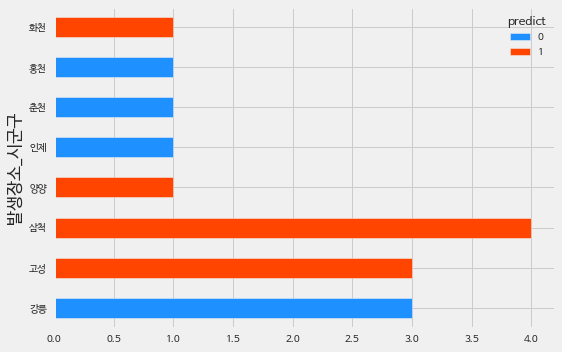

In [ ]:

#plt.rc('font', family='NanumBarunGothic')

#colors = ['dodgerblue','orangered','orange']
#colors = {2:'gold', 1:'orangered', 0:'deepskyblue'}

bb=rrr[rrr['대형산불']==1].groupby(['발생장소_시군구','predict'])
bb.size().unstack().plot(kind='barh',stacked=True,color=colors)

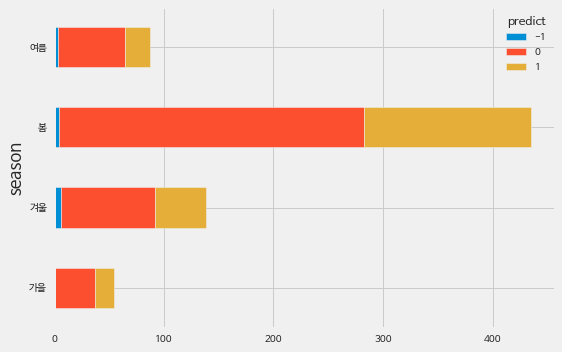

In [ ]:
plt.rc('font', family='NanumBarunGothic')
bb=rrr.groupby(['season','predict'])

#aa.size().sort_values().unstack().plot(kind='barh',stacked=True)
bb.size().loc[['봄','여름','가을','겨울']].sort_values().unstack().plot(kind='barh',stacked=True)

In [ ]:
data7.columns

Index(['pc1', 'pc2', 'pc3', 'pc4', 'season', 'hour', 'month', '진화시간_분',
       '피해면적_합계', '발생장소_시군구', '발생원인_구분'],
      dtype='object')

In [ ]:
scaledata1.columns

Index(['index', '발생장소_시군구', '발생원인_구분', '대형산불', 'season', 'month', 'hour', '기온',
       '강수량log', '풍속log', '풍향', '습도log', '이슬점온도', '현지기압', '해면기압', '일조',
       '지면온도sqrt', '진화시간_분log', '피해면적_합계'],
      dtype='object')

In [ ]:
data5.columns

Index(['index', 'year', 'month', 'day', 'hour', '발생장소_시군구', '발생원인_구분',
       '피해면적_합계', '진화시간_분', '기온', '강수량', '풍속', '풍향', '습도', '이슬점온도', '현지기압',
       '해면기압', '일조', '지면온도', '대형산불', 'season', '강수량log', '풍속log', '습도log',
       '지면온도sqrt', '진화시간_분log'],
      dtype='object')

In [ ]:
aaa=pd.concat([data7,data5['year']],axis=1)
aaa=pd.concat([aaa,scaledata1[['기온','풍향','이슬점온도',
       '현지기압', '해면기압', '일조', '강수량log', '풍속log', '습도log', '지면온도sqrt']]],axis=1)

aaa=pd.concat([aaa,rrr['predict']],axis=1)

### visualization

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 28.2 MB/s 
     |████████████████████████████████| 6.3 MB 40.6 MB/s 
     |████████████████████████████████| 16.7 MB 310 kB/s 


In [ ]:
import folium
import geopandas as gpd

file = '/content/drive/MyDrive/Colab Notebooks/산불/sig.shp'
gw = gpd.read_file(file,encoding='cp949')
#m=folium.Map(location=[37.5,128],
#    tiles='Stamen Terrain')
#m
gw

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."
...,...,...,...,...
245,48870,Hamyang-gun,함양군,"POLYGON ((1017715.723 1751280.191, 1017761.619..."
246,48880,Geochang-gun,거창군,"POLYGON ((1034571.593 1767759.812, 1034559.208..."
247,48890,Hapcheon-gun,합천군,"POLYGON ((1054066.576 1759517.415, 1054101.450..."
248,50110,Jeju-si,제주시,"MULTIPOLYGON (((874410.953 1480515.382, 874408..."


In [ ]:
gw2=gw[gw['SIG_KOR_NM'].isin(['강릉시','고성군','동해시','삼척시','속초시','양구군','양양군','영월군',
 '원주시','인제군','정선군','철원군','춘천시','태백시','평창군','홍천군','화천군','횡성군'])]
#gw2.shape
gw3=gw2.iloc[:18,:]
gw3

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
117,42110,Chuncheon-si,춘천시,"POLYGON ((1007462.095 2008948.792, 1007512.150..."
118,42130,Wonju-si,원주시,"POLYGON ((1038519.196 1944888.174, 1038552.691..."
119,42150,Gangneung-si,강릉시,"MULTIPOLYGON (((1136545.803 1962251.161, 11365..."
120,42170,Donghae-si,동해시,"MULTIPOLYGON (((1140184.975 1956251.627, 11401..."
121,42190,Taebaek-si,태백시,"POLYGON ((1133987.168 1927444.971, 1133980.895..."
122,42210,Sokcho-si,속초시,"MULTIPOLYGON (((1097565.776 2022623.133, 10975..."
123,42230,Samcheok-si,삼척시,"MULTIPOLYGON (((1158822.812 1924922.029, 11588..."
124,42720,Hongcheon-gun,홍천군,"POLYGON ((1046324.015 1994003.079, 1046427.876..."
125,42730,Hoengseong-gun,횡성군,"POLYGON ((1022931.707 1944049.288, 1022936.092..."
126,42750,Yeongwol-gun,영월군,"POLYGON ((1068342.969 1934678.331, 1068367.270..."


In [ ]:
agw=pd.merge(aaa,kkk)
agw=agw.groupby('발생장소_시군구')[['cluster','predict']].agg(pd.Series.mode)
agw=pd.DataFrame(agw)
agw.reset_index(inplace=True)

In [ ]:
agw

,발생장소_시군구,cluster,predict
0,강릉,2,0
1,고성,1,1
2,동해,2,0
3,삼척,1,1
4,속초,0,0
5,양구,1,1
6,양양,1,1
7,영월,2,0
8,원주,0,0
9,인제,0,0


In [ ]:
gw3=gw3.sort_values('SIG_KOR_NM')
gw3.reset_index(inplace=True)
gw4=pd.concat([gw3, agw],axis=1)
gw4

,index,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,발생장소_시군구,cluster,predict
0,119,42150,Gangneung-si,강릉시,"MULTIPOLYGON (((1136545.803 1962251.161, 11365...",강릉,2,0
1,133,42820,Goseong-gun,고성군,"MULTIPOLYGON (((1091705.056 2034023.203, 10917...",고성,1,1
2,120,42170,Donghae-si,동해시,"MULTIPOLYGON (((1140184.975 1956251.627, 11401...",동해,2,0
3,123,42230,Samcheok-si,삼척시,"MULTIPOLYGON (((1158822.812 1924922.029, 11588...",삼척,1,1
4,122,42210,Sokcho-si,속초시,"MULTIPOLYGON (((1097565.776 2022623.133, 10975...",속초,0,0
5,131,42800,Yanggu-gun,양구군,"MULTIPOLYGON (((1046391.747 2032451.649, 10463...",양구,1,1
6,134,42830,Yangyang-gun,양양군,"POLYGON ((1079287.552 2011045.570, 1079356.150...",양양,1,1
7,126,42750,Yeongwol-gun,영월군,"POLYGON ((1068342.969 1934678.331, 1068367.270...",영월,2,0
8,118,42130,Wonju-si,원주시,"POLYGON ((1038519.196 1944888.174, 1038552.691...",원주,0,0
9,132,42810,Inje-gun,인제군,"POLYGON ((1041948.853 1995343.843, 1042054.076...",인제,0,0


<Figure size 1080x1080 with 0 Axes>

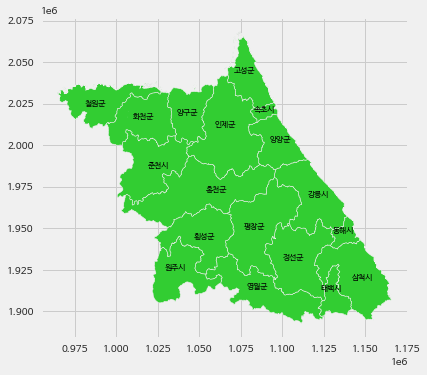

In [ ]:
#ax=gw4.convex_hull.plot(label='cluster')
plt.figure(figsize=(15,15))
gw4.plot(label='cluster',color='limegreen')
gw4['coords'] = gw4['geometry'].apply(lambda x: x.representative_point().coords[:])
gw4['coords'] = [coords[0] for coords in gw4['coords']]

for idx, row in gw4.iterrows():
    plt.annotate(s=row['SIG_KOR_NM'], xy=row['coords'],
                 horizontalalignment='center',
                color='black',
                 fontsize=8)


plt.show()

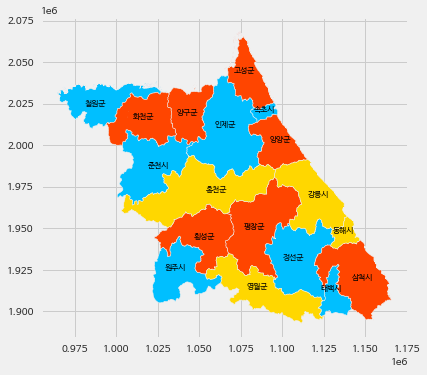

In [ ]:
fig, ax = plt.subplots()
colors = {0:'deepskyblue', 1:'orangered', 2:'gold',3:'forestgreen'}
#grouped = gw4.groupby('cluster')

grouped = gw4.groupby('cluster')


for key, group in grouped:
  group.plot(ax=ax, label=key, color=colors[key])
  #plt.annotate(s=group['SIG_KOR_NM'], xy=group['coords'], horizontalalignment='center', color='blue')
for idx, row in gw4.iterrows():
    plt.annotate(s=row['SIG_KOR_NM'], xy=row['coords'],
                 horizontalalignment='center',
                color='black',
                 fontsize=8)


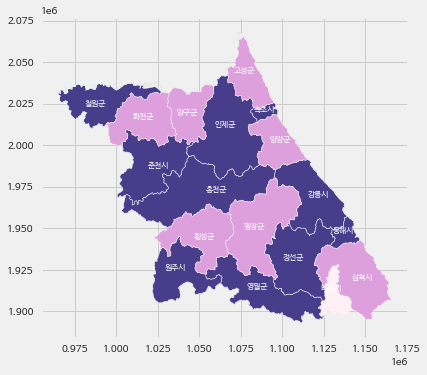

In [ ]:
fig, ax = plt.subplots()
colors = {1:'plum', 0:'darkslateblue', -1:'lavenderblush'}
grouped = gw4.groupby('predict')


for key, group in grouped:
  group.plot(ax=ax, label=key, color=colors[key])
  #plt.annotate(s=group['SIG_KOR_NM'], xy=group['coords'], horizontalalignment='center', color='blue')
for idx, row in gw4.iterrows():
    plt.annotate(s=row['SIG_KOR_NM'], xy=row['coords'],
                 horizontalalignment='center',
                color='white',
                 fontsize=8)


# logistic

In [ ]:
aaa.columns

Index(['pc1', 'pc2', 'pc3', 'pc4', 'season', 'hour', 'month', '진화시간_분',
       '피해면적_합계', '발생장소_시군구', '발생원인_구분', 'year', '기온', '풍향', '이슬점온도', '현지기압',
       '해면기압', '일조', '강수량log', '풍속log', '습도log', '지면온도sqrt', 'predict'],
      dtype='object')

In [ ]:
kkk.columns

Index(['pc1', 'pc2', 'cluster', 'index', '발생장소_시군구', '발생원인_구분', '대형산불',
       'season', 'month', 'hour', '기온', '강수량log', '풍속log', '풍향', '습도log',
       '이슬점온도', '현지기압', '해면기압', '일조', '지면온도sqrt', '진화시간_분log', '피해면적_합계'],
      dtype='object')

In [ ]:
data9=pd.merge(aaa,kkk)

In [ ]:
data9=pd.get_dummies(data9)

In [ ]:
print(data9.대형산불.value_counts())

0    702
1     15
Name: 대형산불, dtype: int64


In [ ]:
data9.columns

Index(['pc1', 'pc2', 'pc3', 'pc4', 'hour', 'month', '진화시간_분', '피해면적_합계',
       'year', '기온', '풍향', '이슬점온도', '현지기압', '해면기압', '일조', '강수량log', '풍속log',
       '습도log', '지면온도sqrt', 'predict', 'cluster', 'index', '대형산불', '진화시간_분log',
       'season_가을', 'season_겨울', 'season_봄', 'season_여름', '발생장소_시군구_강릉',
       '발생장소_시군구_고성', '발생장소_시군구_동해', '발생장소_시군구_삼척', '발생장소_시군구_속초',
       '발생장소_시군구_양구', '발생장소_시군구_양양', '발생장소_시군구_영월', '발생장소_시군구_원주',
       '발생장소_시군구_인제', '발생장소_시군구_정선', '발생장소_시군구_철원', '발생장소_시군구_춘천',
       '발생장소_시군구_태백', '발생장소_시군구_평창', '발생장소_시군구_홍천', '발생장소_시군구_화천',
       '발생장소_시군구_횡성', '발생원인_구분_건', '발생원인_구분_기', '발생원인_구분_담', '발생원인_구분_쓰',
       '발생원인_구분_입'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score

#'cluster','predict',
x = data9[['pc1', 'pc2', 'pc3', 'pc4','month','hour',
       '발생장소_시군구_강릉','발생장소_시군구_고성',
       '발생장소_시군구_동해', '발생장소_시군구_삼척', '발생장소_시군구_속초', '발생장소_시군구_양구',
       '발생장소_시군구_양양', '발생장소_시군구_영월', '발생장소_시군구_원주', '발생장소_시군구_인제',
       '발생장소_시군구_정선', '발생장소_시군구_철원', '발생장소_시군구_춘천', '발생장소_시군구_태백',
       '발생장소_시군구_평창', '발생장소_시군구_홍천', '발생장소_시군구_화천', '발생장소_시군구_횡성']]
y = data9[['대형산불']]


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3,random_state=42)

from sklearn.linear_model import LogisticRegression

def modeling(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    metrics(y_test,pred)

#평가 지표
def metrics(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_score = roc_auc_score(y_test,pred,average='macro')
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1,roc_score,recall))


lr = LogisticRegression()
modeling(lr,x_train,x_test,y_train,y_test)


정확도 : 0.99, 정밀도 : 0.00, 재현율 : 0.00
f1-score : 0.00, auc : 0.50


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
x_train_over,y_train_over = smote.fit_resample(x_train,y_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)
#print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (501, 24) (501, 1)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (978, 24) (978, 1)


In [ ]:
print(y_train.value_counts())
print(y_train_over.value_counts())

대형산불
0       489
1        12
dtype: int64
대형산불
0       489
1       489
dtype: int64


In [ ]:
lr = LogisticRegression()
modeling(lr,x_train_over,x_test,y_train_over,y_test)

#cluster 변수 추가
#정확도 : 0.94, 정밀도 : 0.15, 재현율 : 0.67
#f1-score : 0.25, auc : 0.81

#cluster 변수 없이
#정확도 : 0.95, 정밀도 : 0.17, 재현율 : 0.67
#f1-score : 0.27, auc : 0.81

정확도 : 0.95, 정밀도 : 0.17, 재현율 : 0.67
f1-score : 0.27, auc : 0.81


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       213
           1       0.17      0.67      0.27         3

    accuracy                           0.95       216
   macro avg       0.58      0.81      0.62       216
weighted avg       0.98      0.95      0.96       216



In [ ]:
#display regression coefficients and R-squared value of model
print(lr.intercept_, lr.coef_, lr.score(x_train_over, y_train_over))

[-0.38872111] [[-0.55662764 -1.19373209  0.13920015 -0.54394228 -0.65635159  0.10647799
  -0.36286791 -1.57756299 -0.42492684 -2.0893488  -0.06467758 -3.09460692
  -3.62541126 -2.90536817 -2.92911366 -1.9227273  -2.00935507 -1.66711106
  -2.77495527 -0.88265293 -3.45865983 -3.27656667 -3.70372775 -3.77223147]] 0.9693251533742331


In [ ]:
np.exp(lr.coef_)

array([[0.57313864, 0.303088  , 1.14935412, 0.58045542, 0.51874046,
        1.11235344, 0.69567832, 0.20647767, 0.65381762, 0.12376771,
        0.93736964, 0.04529281, 0.02663814, 0.05472864, 0.05344439,
        0.14620767, 0.13407512, 0.18879169, 0.06235227, 0.41368398,
        0.03147191, 0.03775767, 0.02463153, 0.02300068]])

In [ ]:
keywords = pd.DataFrame(np.exp(lr.coef_),columns=x.columns)
keywords.T.sort_values(by=0,ascending=True)

,0
발생장소_시군구_횡성,0.023001
발생장소_시군구_화천,0.024632
발생장소_시군구_양양,0.026638
발생장소_시군구_평창,0.031472
발생장소_시군구_홍천,0.037758
발생장소_시군구_양구,0.045293
발생장소_시군구_원주,0.053444
발생장소_시군구_영월,0.054729
발생장소_시군구_춘천,0.062352
발생장소_시군구_삼척,0.123768


# Randomforestregressor

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=12,
                            min_samples_leaf=6,
                            min_samples_split=6,
                            n_estimators=14,
                            random_state=42)
rf.fit(x_train_over,y_train_over)

print(rf.score(x_train_over, y_train_over))
#print(rf.score(x_test, y_test))

predicted=rf.predict(x_test)
accuracy=accuracy_score(y_test,predicted)

print(f'Mean accuracy score: {accuracy:.3}')

modeling(rf,x_train_over,x_test,y_train_over,y_test)

#cluster
#정확도 : 0.95, 정밀도 : 0.18, 재현율 : 0.67
#f1-score : 0.29, auc : 0.81

#cluster 없이
#정확도 : 0.95, 정밀도 : 0.17, 재현율 : 0.67
#f1-score : 0.27, auc : 0.81

0.9723926380368099
Mean accuracy score: 0.949
정확도 : 0.95, 정밀도 : 0.17, 재현율 : 0.67
f1-score : 0.27, auc : 0.81


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       213
           1       0.17      0.67      0.27         3

    accuracy                           0.95       216
   macro avg       0.58      0.81      0.62       216
weighted avg       0.98      0.95      0.96       216



In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [8,10,12,14],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [6,8,10],
           'min_samples_split' : [6,8,10]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train_over, y_train_over)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 14}
최고 예측 정확도: 0.9366


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



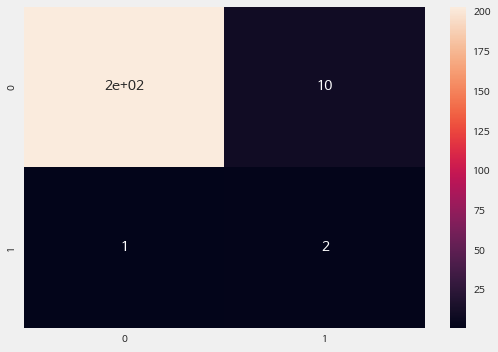

In [ ]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted))
sns.heatmap(cm, annot=True)

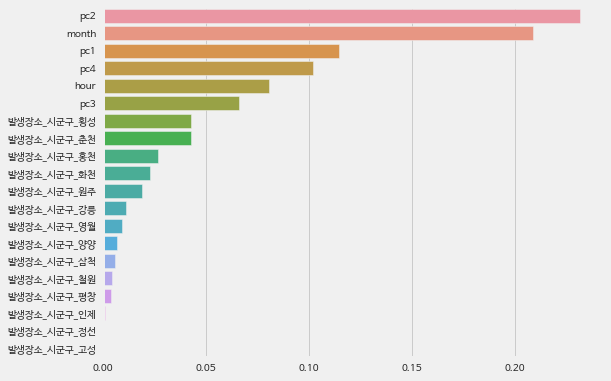

In [ ]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
#%matplotlib inline
plt.rc('font', family='NanumBarunGothic')

ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

# light gbm

In [ ]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
lgbm_clf = LGBMClassifier(n_estimators=10, n_jobs=-1, boost_from_average=False)
modeling(lgbm_clf, x_train_over, x_test, y_train_over, y_test)

#cluster
#정확도 : 0.93, 정밀도 : 0.12, 재현율 : 0.67
#f1-score : 0.21, auc : 0.80

#cluster 없이
#정확도 : 0.96, 정밀도 : 0.22, 재현율 : 0.67
#f1-score : 0.33, auc : 0.82

정확도 : 0.96, 정밀도 : 0.22, 재현율 : 0.67
f1-score : 0.33, auc : 0.82


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



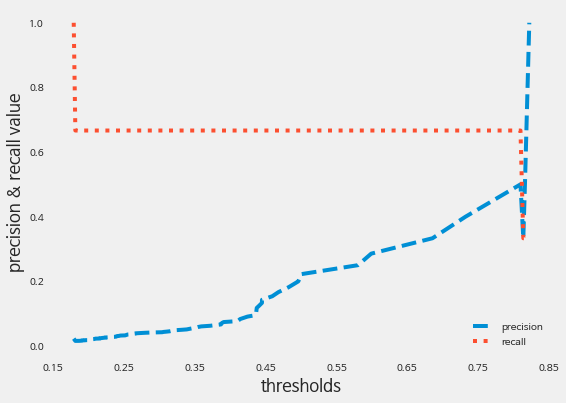

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def precision_recall_curve_plot(y_test, pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)

    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle=':', label='recall')

    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))

    plt.xlim()
    plt.xlabel('thresholds')
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

pred_proba = lgbm_clf.predict_proba(x_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba)

#precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])

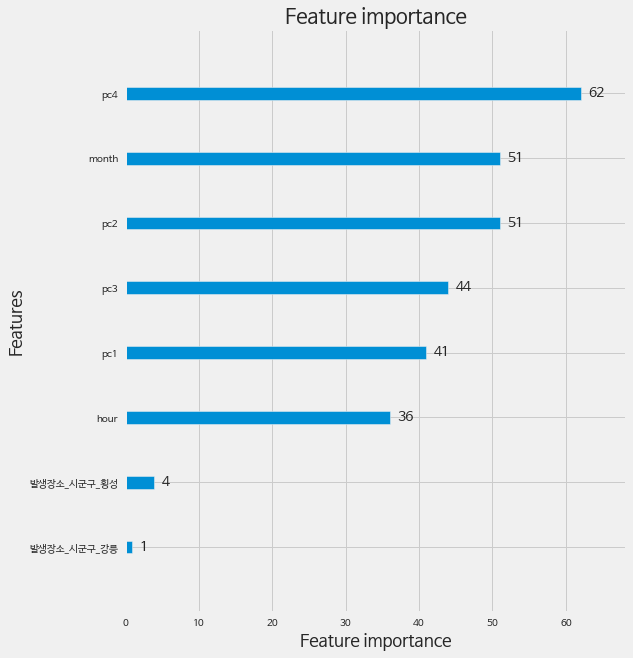

In [ ]:
fig,ax=plt.subplots(figsize=(8,10))
lgb.plot_importance(lgbm_clf,ax=ax)

# soft voting

In [ ]:
from sklearn.ensemble import VotingClassifier

# 개별모델을 소프트보팅 기반의 앙상블 모델로 구현한 분류기
voting_model = VotingClassifier(estimators=[ ('LogisticRegression', lr),
                                            ('LGBM', lgbm_clf),
                                            ('RandomForest',rf)], voting='soft')


# 보팅 분류기의 학습/예측/평가
voting_model.fit(x_train_over, y_train_over)
pred = voting_model.predict(x_test)
print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))
print('보팅 분류기의 정밀도: {0: .4f}'.format(precision_score(y_test,pred)))
print('보팅 분류기의 재현율: {0: .4f}'.format(recall_score(y_test, pred)))
print('보팅 분류기의 f1score: {0: .4f}'.format(f1_score(y_test, pred)))
print()

# 개별 모델의 학습/예측/평가
classifiers = [lr, lgbm_clf,rf]
for classifier in classifiers:
    classifier.fit(x_train_over, y_train_over)
    pred = classifier.predict(x_test)
    class_name = classifier.__class__.__name__

    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_score = roc_auc_score(y_test,pred,average='macro')
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1,roc_score,recall))


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py

보팅 분류기의 정확도:  0.9676
보팅 분류기의 정밀도:  0.2500
보팅 분류기의 재현율:  0.6667
보팅 분류기의 f1score:  0.3636

정확도 : 0.95, 정밀도 : 0.17, 재현율 : 0.67
f1-score : 0.27, auc : 0.81
정확도 : 0.96, 정밀도 : 0.22, 재현율 : 0.67
f1-score : 0.33, auc : 0.82
정확도 : 0.95, 정밀도 : 0.17, 재현율 : 0.67
f1-score : 0.27, auc : 0.81


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



보팅 분류기의 정확도:  0.9722
보팅 분류기의 정밀도:  0.2857
보팅 분류기의 재현율:  0.6667
보팅 분류기의 f1score:  0.4000

로지스틱)정확도 : 0.94, 정밀도 : 0.15, 재현율 : 0.67
f1-score : 0.25, auc : 0.81.  
랜덤포레스트)정확도 : 0.93, 정밀도 : 0.12, 재현율 : 0.67
f1-score : 0.21, auc : 0.80.   
lgbm)정확도 : 0.95, 정밀도 : 0.18, 재현율 : 0.67
f1-score : 0.29, auc : 0.81.

* cluster 변수 없이

보팅 분류기의 정확도:  0.9676
보팅 분류기의 정밀도:  0.2500
보팅 분류기의 재현율:  0.6667
보팅 분류기의 f1score:  0.3636   

로지스틱)정확도 : 0.95, 정밀도 : 0.17, 재현율 : 0.67
f1-score : 0.27, auc : 0.81   
랜덤포레스트)정확도 : 0.96, 정밀도 : 0.22, 재현율 : 0.67
f1-score : 0.33, auc : 0.82   
lgbm)정확도 : 0.95, 정밀도 : 0.17, 재현율 : 0.67
f1-score : 0.27, auc : 0.81   